https://twitter.com/charliemansell/status/1257068455645392896

What's up with Scotland?

In [56]:
%%time
dataset_name = "W19_comb"
df_list = [ "BES_Panel" ]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

if "id" in BES_Panel.columns:
    BES_Panel = BES_Panel.set_index("id").sort_index()

(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
    

# get full set of inferred "cross wave" auth-lib/left-right values and ages
# pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
pan_dataset_ages = pd.read_pickle( BES_small_data_files + "pan_dataset_ages"+".zip" ,compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files + "pan_dataset_votes"+".zip", compression='zip')

Toggle code

var_type (7911, 14)
Wall time: 27.6 s


In [57]:
BES_Panel = pd.read_pickle("..\\BES_analysis_data\\"+"W19_comb"+os.sep+"BES_Panelv02",compression='zip')
BES_Panel = BES_Panel.set_index("id")
BES_Panel = BES_Panel.sort_index()

pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index]

In [2]:
def weighted_qcut(values, weights, q, **kwargs):
    if is_integer(q):
        quantiles = np.linspace(0, 1, q + 1)
    else:
        quantiles = q
    #order = weights[values.argsort()].cumsum()
    order = weights[weights.index[values.argsort()]].cumsum()
    bins = pd.cut(order / order.iloc[-1], quantiles, **kwargs)
    return bins.sort_index()

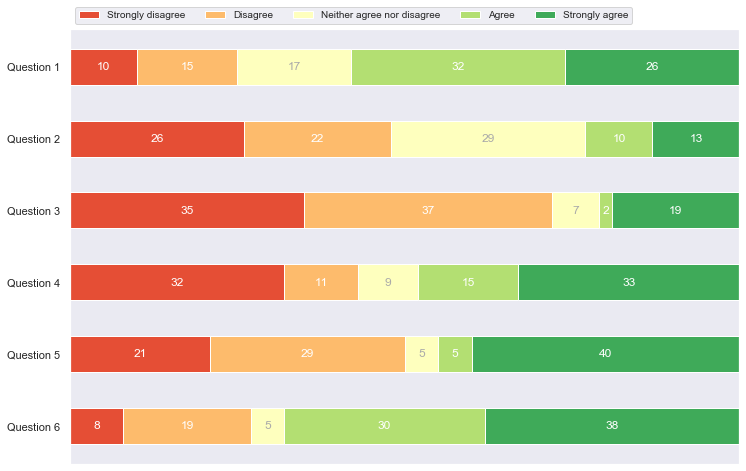

In [3]:

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names, fig_size=(12,8),legend_col_max=5):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=fig_size)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=min(len(category_names),legend_col_max), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

survey(results, category_names)
plt.show()


In [4]:
pan_dataset_allr_values.columns

Index(['Economic: Left(0) <-> Right(200){uniform}',
       'Social: Liberalism(0) <-> Conservatism(200){uniform}',
       'Economic: Left <-> Right{gaussian-ish}',
       'Social: Liberalism <-> Conservatism{gaussian-ish}',
       'Economic: Left <-> Right{gaussian-ish}completish',
       'Economic: Left <-> Right{gaussian-ish}complete',
       'Social: Liberalism <-> Conservatism{gaussian-ish}completish',
       'Social: Liberalism <-> Conservatism{gaussian-ish}complete'],
      dtype='object')

In [5]:
lr_col = pan_dataset_allr_values.columns[5]
al_col = pan_dataset_allr_values.columns[7]

In [6]:
mask = BES_Panel["gorW19"].notnull() & BES_Panel["wave19"] & BES_Panel["wt_new_W19_result"].notnull()

mask = mask & ~(pan_dataset_allr_values[al_col][mask].isnull()|pan_dataset_allr_values[lr_col][mask].isnull())
mask.sum()

32072

In [183]:
# mask = BES_Panel["gorW19"].notnull() & BES_Panel["wave19"] & BES_Panel[""]


# match(BES_Panel,"wt_new")

In [184]:
# pan_dataset_allr_values[al_col][mask].isnull().sum()

In [7]:
# pan_dataset_allr_values[lr_col][mask].isnull().sum()
pan_dataset_allr_values

Economic: Left(0) <-> Right(200){uniform}  \
id                                                 
1                                            6.0   
2                                          195.0   
3                                           74.0   
4                                          149.0   
5                                          169.0   
...                                          ...   
98447                                      118.0   
98448                                      159.0   
98449                                       42.0   
98450                                       94.0   
98451                                       71.0   

       Social: Liberalism(0) <-> Conservatism(200){uniform}  \
id                                                            
1                                                  183.0      
2                                                   54.0      
3                                                  116.0      
4                                                  132.0      
5                                                   99.0      
...                                                  ...      
98447                                               57.0      
98448                                               23.0      
98449                                               49.0      
98450                                              149.0      
98451                                              125.0      

       Economic: Left <-> Right{gaussian-ish}  \
id                                              
1                                   -1.913311   
2                                    1.929016   
3                                   -0.313073   
4                                    0.643054   
5                                    1.004469   
...                                       ...   
98447                                0.217387   
98448                                0.791833   
98449                               -0.789732   
98450                               -0.056723   
98451                               -0.351287   

       Social: Liberalism <-> Conservatism{gaussian-ish}  \
id                                                         
1                                               1.379564   
2                                              -0.648342   
3                                               0.242132   
4                                               0.470176   
5                                               0.012041   
...                                                  ...   
98447                                          -0.585382   
98448                                          -1.276719   
98449                                          -0.721598   
98450                                           0.706377   
98451                                           0.371110   

       Economic: Left <-> Right{gaussian-ish}completish  \
id                                                        
1                                             -1.913311   
2                                              1.929016   
3                                             -0.313073   
4                                              0.643054   
5                                              1.004469   
...                                                 ...   
98447                                          0.217387   
98448                                          0.791833   
98449                                         -0.789732   
98450                                         -0.056723   
98451                                         -0.351287   

       Economic: Left <-> Right{gaussian-ish}complete  \
id                                                      
1                                           -1.913311   
2                                            1.929016   
3                                           -0.313073   
4                                     

In [ ]:
def weighted_mean(x):
    if x.empty:
        return np.nan    
    val, weight = map(np.asarray, zip(*x))
    val, weight = val[~np.isnan(val)],weight[~np.isnan(val)]
    return (val * weight).sum() / weight.sum()

In [17]:
search(BES_Panel,"wt_new_W17")

wt_new_W17          34366
wt_new_W17W18W19    19000
dtype: int64

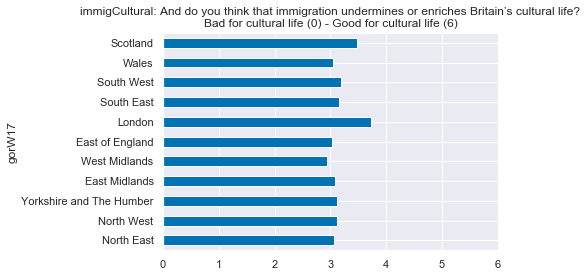

In [38]:
immigCulturalW17_num = BES_Panel["immigCulturalW17"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

mask = immigCulturalW17_num.notnull()&BES_Panel["gorW17"].notnull()&BES_Panel["wt_new_W17"].notnull()
immigCulturalW17_wts = pd.Series(list(zip(immigCulturalW17_num,BES_Panel["wt_new_W17"])),index=immigCulturalW17_num.index)
means = immigCulturalW17_wts[mask].groupby(BES_Panel["gorW17"][mask]).agg(weighted_mean)
means.plot(kind='barh');
plt.xlim([0,6]);
plt.title("immigCultural: And do you think that immigration undermines or enriches Britain’s cultural life?"+"\n"+\
          "Bad for cultural life (0) - Good for cultural life (6)"
         );

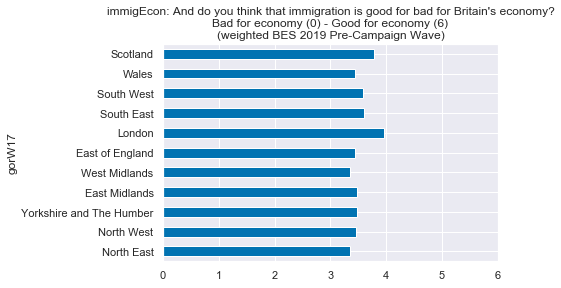

In [40]:
immigCulturalW17_num = BES_Panel["immigEconW17"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

mask = immigCulturalW17_num.notnull()&BES_Panel["gorW17"].notnull()&BES_Panel["wt_new_W17"].notnull()
immigCulturalW17_wts = pd.Series(list(zip(immigCulturalW17_num,BES_Panel["wt_new_W17"])),index=immigCulturalW17_num.index)
means = immigCulturalW17_wts[mask].groupby(BES_Panel["gorW17"][mask]).agg(weighted_mean)
means.plot(kind='barh');
plt.xlim([0,6]);
plt.title("immigEcon: And do you think that immigration is good for bad for Britain's economy?"+"\n"+\
          "Bad for economy (0) - Good for economy (6)"+"\n"+\
          "(weighted BES 2019 Pre-Campaign Wave)"
          
         );

In [34]:
immigCulturalW17_num.max()

6.0

In [8]:
df = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel["wt_new_W19_result"][mask],5 )
df.name = 'Economic Left-Right'

weighted_value_counts(df, BES_Panel["wt_new_W19_result"][mask])
# def weighted_qcut(values, weights, q, **kwargs):

weighted_sample_size  raw_sample_size
Economic Left-Right                                       
(0.0, 0.2]                    6379.020020           6994.0
(0.4, 0.6]                    6379.089844           5823.0
(0.2, 0.4]                    6379.979980           6162.0
(0.6, 0.8]                    6380.129883           6108.0
(0.8, 1.0]                    6380.459961           6985.0

In [10]:
%%time
df = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel["wt_new_W19_result"][mask],3 )
df.name = 'Economic Left-Right'
df = df.cat.rename_categories(["Left","Centre","Right"])
pd.crosstab(index=BES_Panel["gorW19"][mask],
             columns=df,
             values=BES_Panel["wt_new_W19_result"][mask],
             aggfunc=sum, normalize = 'index')*100

Wall time: 56 ms


Economic Left-Right            Left     Centre      Right
gorW19                                                   
North East                36.317963  34.256557  29.425482
North West                37.371429  32.864773  29.763803
Yorkshire and The Humber  34.391945  34.346359  31.261688
East Midlands             31.487316  32.295650  36.217037
West Midlands             30.852150  32.684082  36.463768
East of England           28.979631  33.468788  37.551582
London                    35.505669  35.363724  29.130602
South East                28.639013  33.243305  38.117680
South West                30.973497  33.424297  35.602207
Wales                     37.460423  33.616798  28.922781
Scotland                  39.306599  30.762867  29.930534

In [11]:
%%time
lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel["wt_new_W19_result"][mask],3 )
lr.name = 'Economic Left-Right'
lr = lr.cat.rename_categories(["Left","Centre","Right"])
pd.crosstab(index=BES_Panel["gorW19"][mask],
             columns=lr,
             values=BES_Panel["wt_new_W19_result"][mask],
             aggfunc=sum, normalize = 'index')*100

Wall time: 65 ms


Economic Left-Right            Left     Centre      Right
gorW19                                                   
North East                36.317963  34.256557  29.425482
North West                37.371429  32.864773  29.763803
Yorkshire and The Humber  34.391945  34.346359  31.261688
East Midlands             31.487316  32.295650  36.217037
West Midlands             30.852150  32.684082  36.463768
East of England           28.979631  33.468788  37.551582
London                    35.505669  35.363724  29.130602
South East                28.639013  33.243305  38.117680
South West                30.973497  33.424297  35.602207
Wales                     37.460423  33.616798  28.922781
Scotland                  39.306599  30.762867  29.930534

In [12]:
%%time
al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel["wt_new_W19_result"][mask],3 )
al.name = 'Social Liberal-Authoritarian'
al = al.cat.rename_categories(["Liberal","Moderate","Authoritarian"])
pd.crosstab(index=BES_Panel["gorW19"][mask],
             columns=al,
             values=BES_Panel["wt_new_W19_result"][mask],
             aggfunc=sum, normalize = 'index')*100

Wall time: 60 ms


Social Liberal-Authoritarian    Liberal   Moderate  Authoritarian
gorW19                                                           
North East                    26.710745  34.232288      39.056961
North West                    32.557713  33.145485      34.296806
Yorkshire and The Humber      30.709209  33.862000      35.428795
East Midlands                 30.064444  34.795273      35.140282
West Midlands                 28.843557  34.867828      36.288612
East of England               31.224548  33.683144      35.092312
London                        41.866856  31.961611      26.171532
South East                    34.112083  32.585941      33.301971
South West                    33.628292  32.937931      33.433769
Wales                         32.415993  32.359245      35.224766
Scotland                      36.322205  33.588676      30.089119

In [ ]:

al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel["wt_new_W19_result"][mask],3 )
al.name = 'Social Liberal-Authoritarian'
al = al.cat.rename_categories(["Liberal","Moderate","Authoritarian"])

lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel["wt_new_W19_result"][mask],3 )
lr.name = 'Economic Left-Right'
lr = lr.cat.rename_categories(["Left","Centre","Right"])

df = pd.concat([al,lr],axis=1).apply(lambda x: x[lr.name]+"-"+x[al.name],axis=1).astype('category')
df = df.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',])

In [201]:
df = pd.concat([al,lr],axis=1).apply(lambda x: x[lr.name]+"-"+x[al.name],axis=1).astype('category')
df = df.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',])

ct = pd.crosstab(index=BES_Panel["gorW19"][mask],
             columns=df,
             values=BES_Panel["wt_new_W19_result"][mask],
             aggfunc=sum, normalize = 'index')*100

In [202]:

ct

col_0                     Left-Liberal  Left-Moderate  Left-Authoritarian  \
gorW19                                                                      
North East                   10.509969       9.754201           16.053797   
North West                   13.072577       9.621054           14.677795   
Yorkshire and The Humber     11.528076       9.999683           12.864186   
East Midlands                10.362107       9.369543           11.755662   
West Midlands                 9.359497       8.331907           13.160745   
East of England              10.269939       6.986629           11.723063   
London                       17.307281       7.956327           10.242063   
South East                   10.581894       7.553778           10.503344   
South West                   11.041125       7.792078           12.140289   
Wales                        12.671929       9.430264           15.358226   
Scotland                     16.857378       9.765232           12.683988   

col_0                     Centre-Liberal  Centre-Moderate  \
gorW19                                                      
North East                      8.651115        12.617218   
North West                      9.776793        12.669455   
Yorkshire and The Humber       10.043207        11.352663   
East Midlands                   9.383610        11.531682   
West Midlands                   9.122823        12.365690   
East of England                 9.300615        12.830507   
London                         13.939291        13.430539   
South East                     10.294895        12.616070   
South West                     11.493610        12.095266   
Wales                          10.119391        12.804778   
Scotland                        9.337153        12.702123   

col_0                     Centre-Authoritarian  Right-Liberal  Right-Moderate  \
gorW19                                                                          
North East                           12.988225       7.549664       11.860873   
North West                           10.418522       9.708339       10.854975   
Yorkshire and The Humber             12.950489       9.137923       12.509648   
East Midlands                        11.380352      10.318724       13.894044   
West Midlands                        11.195564      10.361238       14.170228   
East of England                      11.337666      11.653993       13.866006   
London                                7.993895      10.620280       10.574744   
South East                           10.332339      13.235293       12.416098   
South West                            9.835417      11.093557       13.050586   
Wales                                10.692629       9.624670       10.124202   
Scotland                              8.723591      10.127672       11.121323   

col_0                     Right-Authoritarian  
gorW19                                         
North East                          10.014944  
North West                           9.200486  
Yorkshire and The Humber             9.614115  
East Midlands                       12.004267  
West Midlands                       11.932300  
East of England                     12.031584  
London                               7.935575  
South East                          12.466290  
South West                          11.458062  
Wales                                9.173908  
Scotland                             8.681540

In [203]:
df.name = "pol_comp"
weighted_value_counts(df, BES_Panel["wt_new_W19_result"][mask],normalize=True,perc=True).sort_index()

weighted_sample_percentage  raw_sample_size
pol_comp                                                         
Left-Liberal                               12.33           4417.0
Left-Moderate                               8.60           2686.0
Left-Authoritarian                         12.40           4021.0
Centre-Liberal                             10.37           3219.0
Centre-Moderate                            12.49           3396.0
Centre-Authoritarian                       10.47           3275.0
Right-Liberal                              10.63           3365.0
Right-Moderate                             12.24           3891.0
Right-Authoritarian                        10.47           3802.0

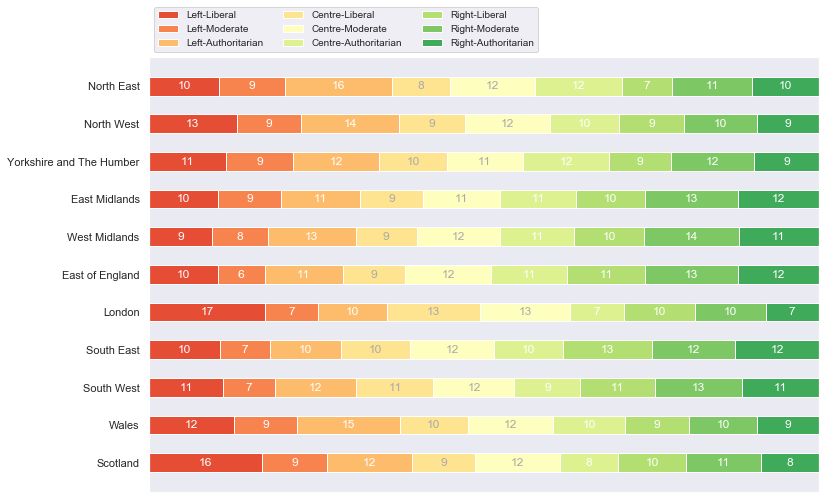

In [204]:
category_names = df.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

In [233]:
party_colour_dict = {"Lab":"red","LAB":"red",
                     "Con":'blue',"CON":'blue',"UKIP":"purple","LD":"orange",
                     "Grn":'green',"GRN":'green',
                     "BrexitParty":"cyan","BXP":'cyan',
                     "TIG":"pink","BNP":"magenta",
                     "SNP":'yellow',"PC":'olive',
                     "Remain":"yellow","REMAIN":'yellow',"Leave":"blue","LEAVE":'blue',
                     "Don't know":"grey","DK":'grey',
                     "Won't vote":"black","DNV":'black',"NON":'black',
                     "???":'lightgrey',"<18":'pink',"?":'darkgrey',"NULL":'black',
                     }

# party_list = list( BES_Panel[ ['profile_past_vote_2005','profile_past_vote_2010','profile_past_vote_2015' ] ].stack().unique() )
# party_list.append('I would not vote')
replace_dict = {'Labour Party':"LAB", 
 'United Kingdom Independence Party (UKIP)':"UKIP",
 'Labour':"LAB",
 'Conservative Party':"CON",
 'Conservative':"CON",
 'Liberal Democrats':"LD",
 'Did not vote':"DNV",
 'Scottish National Party':"SNP",
 'Scottish National Party (SNP)':"SNP",
 'British National Party (BNP)':"BNP",
 'Green Party':"GP",
 'Green':"GP",
 'Liberal Democrat':"LD",
 "Don't know":"DK",
 'Some other party':"OTH",
 'Veritas':"VER",
 'Plaid Cymru':"PC",
 'Other':"OTH",
 'Respect':"RES",
 'I would not vote':"DNV",
 "Brexit Party":"BXP",
 'Change UK- The Independent Group':"CUK",
 "Leave the EU":"LEAVE",
 "Stay/remain in the EU":"REMAIN",
 "Not Present":"NULL",
 "Ambiguous category":"?",
 "Unknown":"???",
 "Too Young To Vote":"<18",}



colourmap = {'LAB':'red', 'UKIP':'purple', 'CON':'blue', 'SNP':'yellow', 'BNP':'black', 'LD':'orange', 'DNV':'dimgray', 'DK':'lightgray', 'OTH':'brown', 'GP':'green',
       'VER':'pink', 'PC':'olive', 'RES':'peru', "BXP":'cyan',"CUK":'black','LEAVE':'blue','REMAIN':'yellow',
       "???":'grey',"<18":'pink',"?":'grey',"NULL":'black',     }
base_order = ['LAB','CON','DK','UKIP','LD','SNP','DNV','GP','PC','BNP','OTH','RES','VER']
lr_order   = ['GP','PC','LAB','SNP','DK','OTH','DNV','LD','CON','UKIP','BNP','RES','VER']
cmap = ['red','purple','blue','yellow','black','orange','grey','cyan','brown','green','pink','olive','peru']

In [205]:
al_scale = BES_Panel[search(BES_Panel,"al_scale").index].apply(lambda x:x.cat.codes.replace(-1,np.nan)).mean(axis=1)/20
lr_scale = BES_Panel[search(BES_Panel,"lr_scale").index].apply(lambda x:x.cat.codes.replace(-1,np.nan)).mean(axis=1)/20

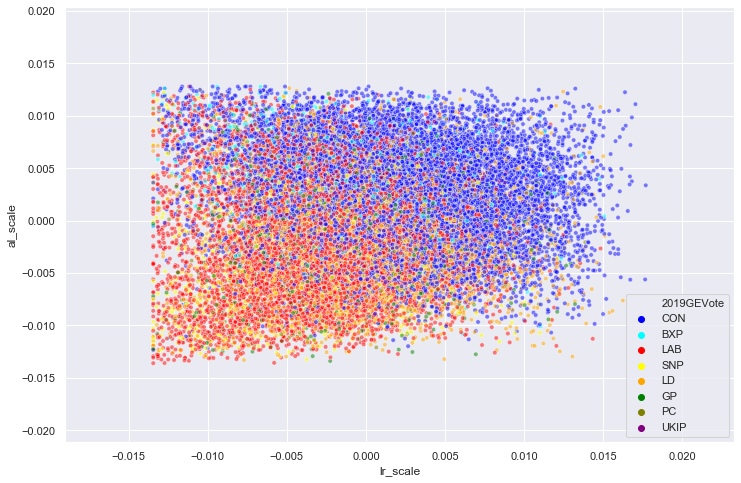

In [235]:
df=pd.DataFrame()
df["al_scale"] = pan_dataset_allr_values[pan_dataset_allr_values.columns[3]][mask]/200
df["lr_scale"] = pan_dataset_allr_values[pan_dataset_allr_values.columns[2]][mask]/200
df["2019GEVote"] = pan_dataset_votes["2019GEVote_complete"][mask]
drop_list = ["Unknown","Not Present","Did not vote","Don't know","Other"]
df = df[df["2019GEVote"].notnull() & df["2019GEVote"].apply(lambda x: x not in drop_list)]
df["2019GEVote"].cat.remove_unused_categories(inplace=True)
df["2019GEVote"] = df["2019GEVote"].replace(replace_dict)

plt.figure(figsize=(12,8));
sns.scatterplot(data=df,y='al_scale',x='lr_scale',hue ='2019GEVote', s=20, alpha=.5,palette=colourmap);

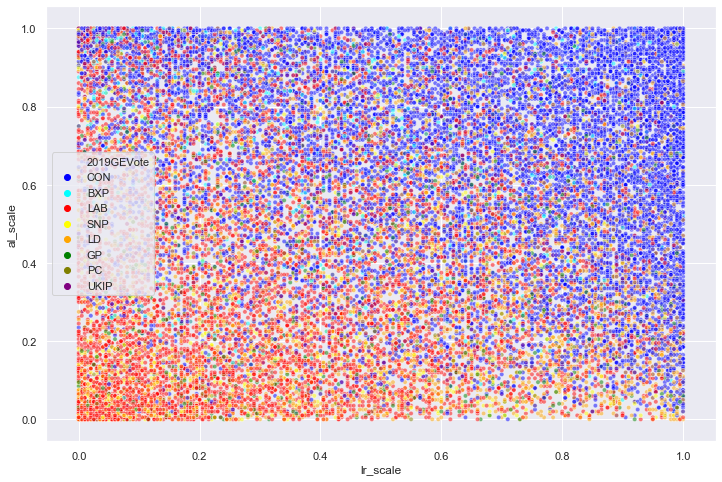

In [239]:
df=pd.DataFrame()
df["al_scale"] = pan_dataset_allr_values[pan_dataset_allr_values.columns[1]][mask]/200
df["lr_scale"] = pan_dataset_allr_values[pan_dataset_allr_values.columns[0]][mask]/200
df["2019GEVote"] = pan_dataset_votes["2019GEVote_complete"][mask]
drop_list = ["Unknown","Not Present","Did not vote","Don't know","Other"]
df = df[ df["2019GEVote"].notnull() & df["2019GEVote"].apply(lambda x: x not in drop_list) ]
df["2019GEVote"].cat.remove_unused_categories(inplace=True)
df["2019GEVote"] = df["2019GEVote"].replace(replace_dict)

plt.figure(figsize=(12,8));
sns.scatterplot(data=df,y='al_scale',x='lr_scale',hue ='2019GEVote', s=20, alpha=.5,palette=colourmap);

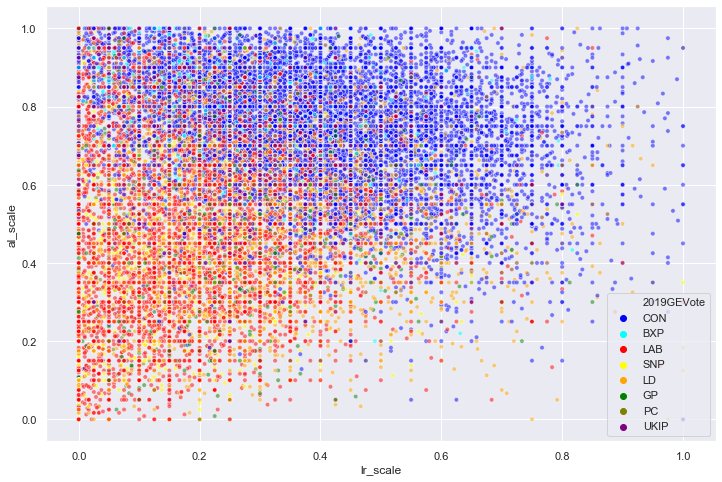

In [237]:
df=pd.DataFrame()
df["al_scale"] = al_scale
df["lr_scale"] = lr_scale
df["2019GEVote"] = pan_dataset_votes["2019GEVote_complete"]
drop_list = ["Unknown","Not Present","Did not vote","Don't know","Other"]
mask = df["2019GEVote"].notnull() & df["2019GEVote"].apply(lambda x: x not in drop_list)
df = df[mask]
df["2019GEVote"].cat.remove_unused_categories(inplace=True)
df["2019GEVote"] = df["2019GEVote"].replace(replace_dict)

plt.figure(figsize=(12,8));
sns.scatterplot(data=df,y='al_scale',x='lr_scale',hue ='2019GEVote', s=20, alpha=.5,palette=colourmap);

In [190]:
def weighted_qcut(values, weights, q, **kwargs):
    if is_integer(q):
        quantiles = np.linspace(0, 1, q + 1)
    else:
        quantiles = q
    #order = weights[values.argsort()].cumsum()
    order = weights[weights.index[values.argsort()]].cumsum()
    bins = pd.cut(order / order.iloc[-1], quantiles, **kwargs)
    return bins.sort_index

In [61]:
# pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')

In [75]:
search(BES_Panel,"wt_full_W1")

wt_full_W1W2W3                21489
wt_full_W1W2W3W4              19003
wt_full_W1W2W3W4W5            17673
wt_full_W1W2W3W4W5W6          16807
wt_full_W1W2W3W4W5W6W7W8      11411
wt_full_W1W2W3W4W5W6W7W8W9    10172
wt_full_W10                   30237
wt_full_W11                   30956
wt_full_W1_W11                 6473
wt_full_W1                    30235
wt_full_W1W2                  26866
wt_full_W1W2W3W4W5W6W7        13313
dtype: int64

In [59]:
ct = pd.crosstab(index=BES_Panel["gorW19"][mask],
             columns=pan_dataset_ages["equalisedAgeGroup_at_W1_detailed"][mask],
             values=BES_Panel["wt_new_W19_result"][mask],
             aggfunc=sum, normalize = 'index')*100

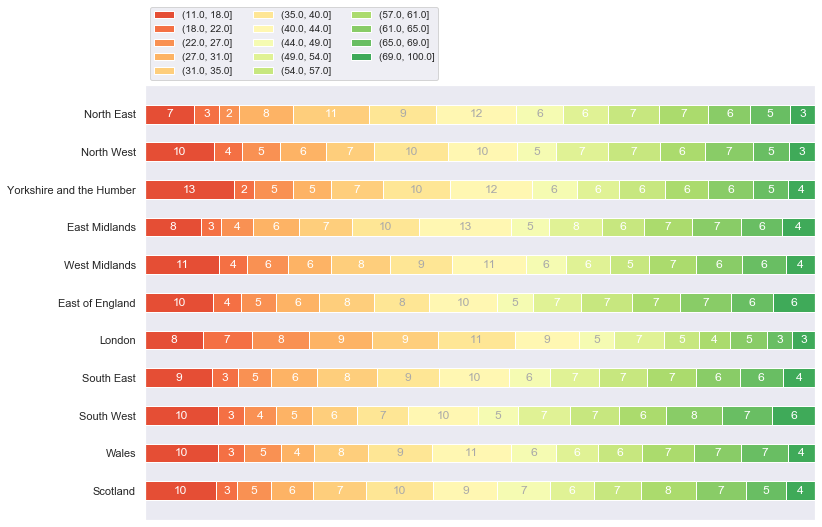

In [60]:
category_names = pan_dataset_ages["equalisedAgeGroup_at_W1_detailed"].cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

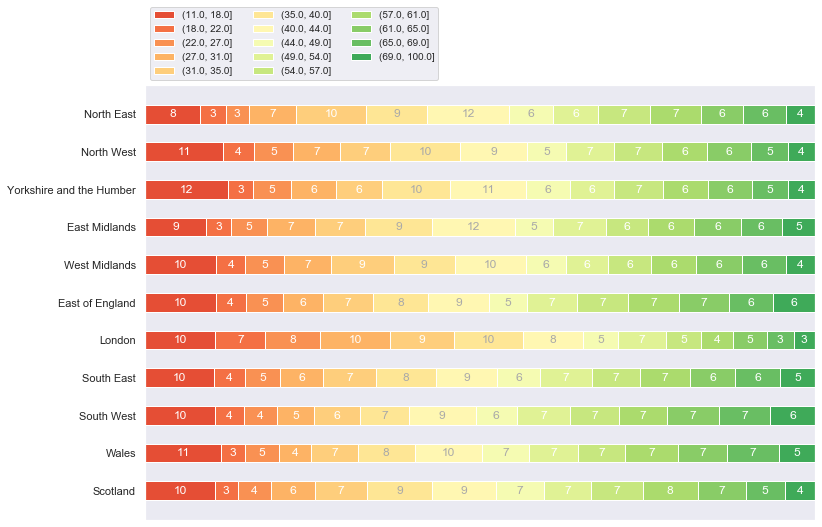

In [63]:
region_ser = BES_Panel["gorW19"]
split_ser = pan_dataset_ages["equalisedAgeGroup_at_W1_detailed"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

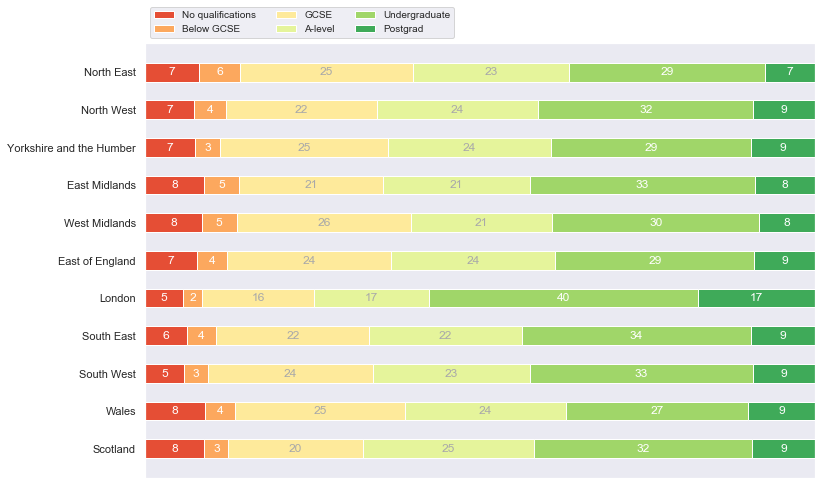

In [66]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_edlevelW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

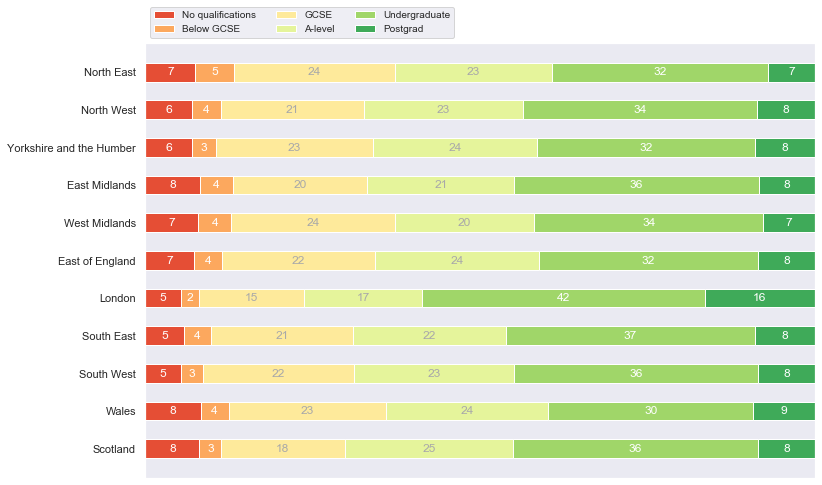

In [67]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_edlevelUniW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

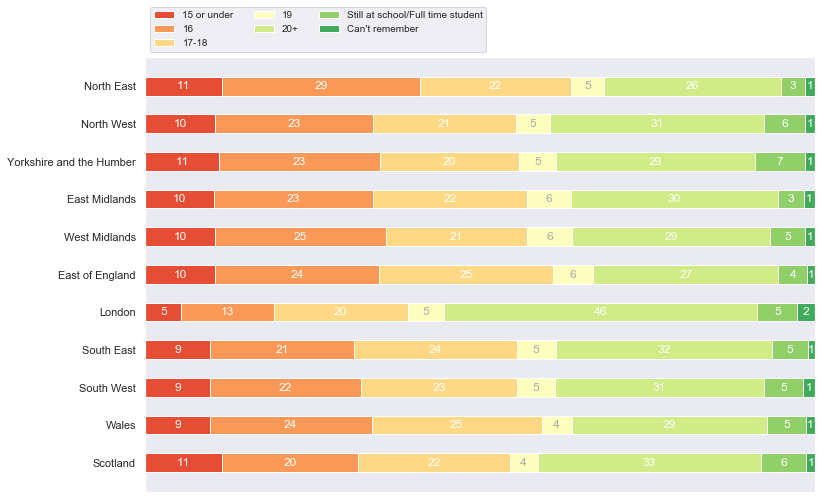

In [69]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_education_ageW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

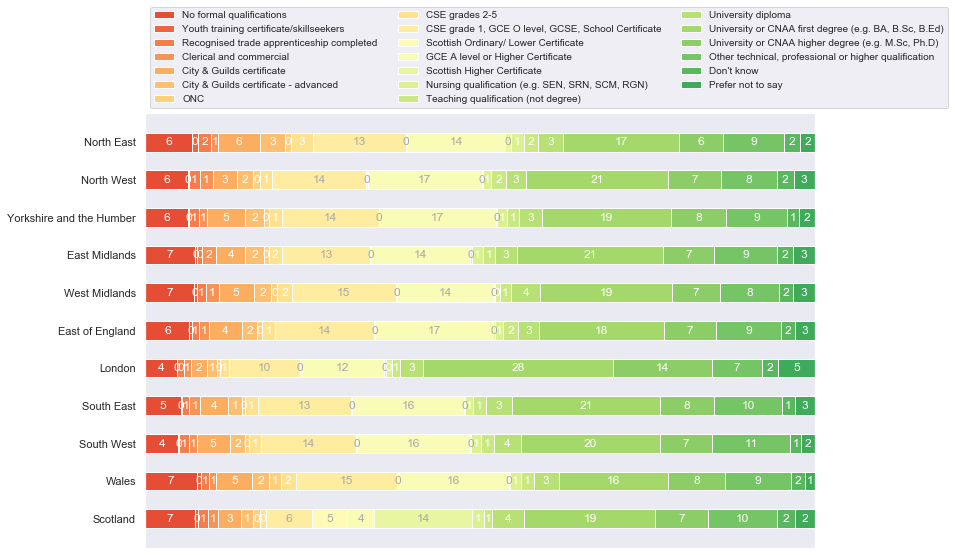

In [70]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_educationW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

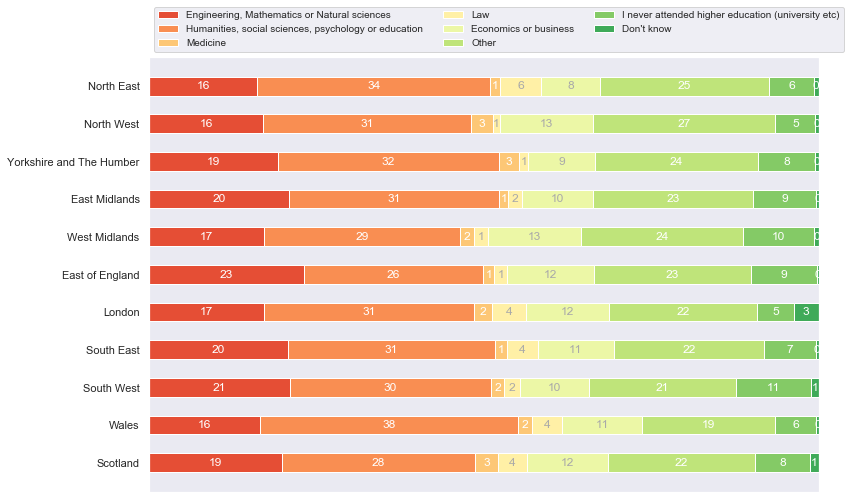

In [76]:

region_ser = BES_Panel["gorW2"]
split_ser = BES_Panel["subjectHEW1_W3"]
wt_ser = BES_Panel["wt_full_W1W2W3"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

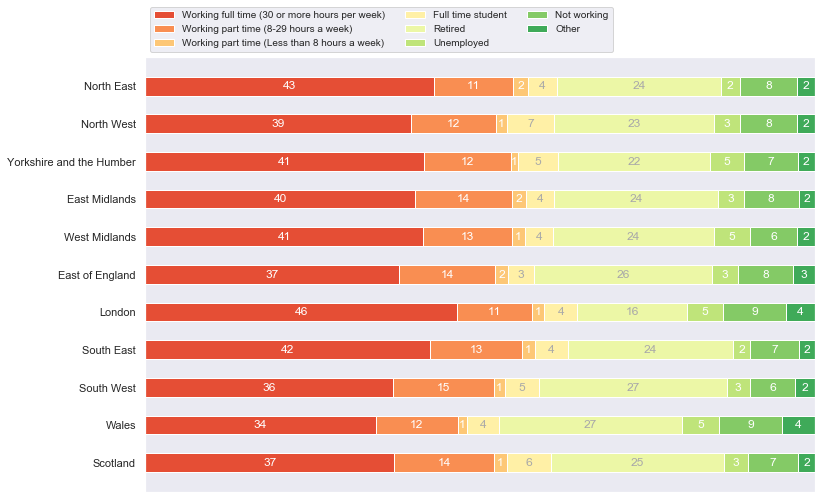

In [80]:

region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_work_statW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

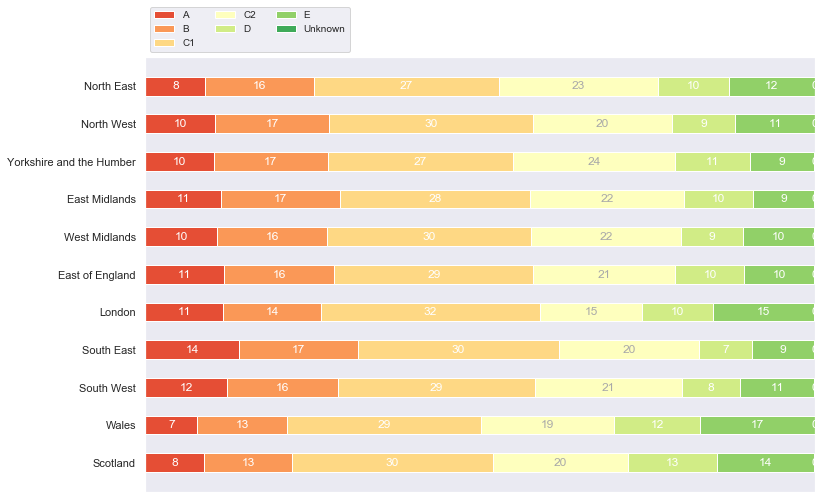

In [81]:

region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_socgradeW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

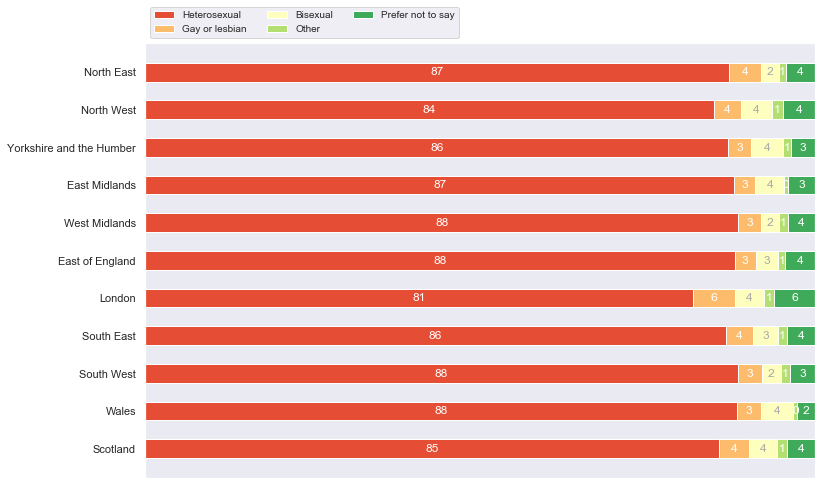

In [82]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_sexualityW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

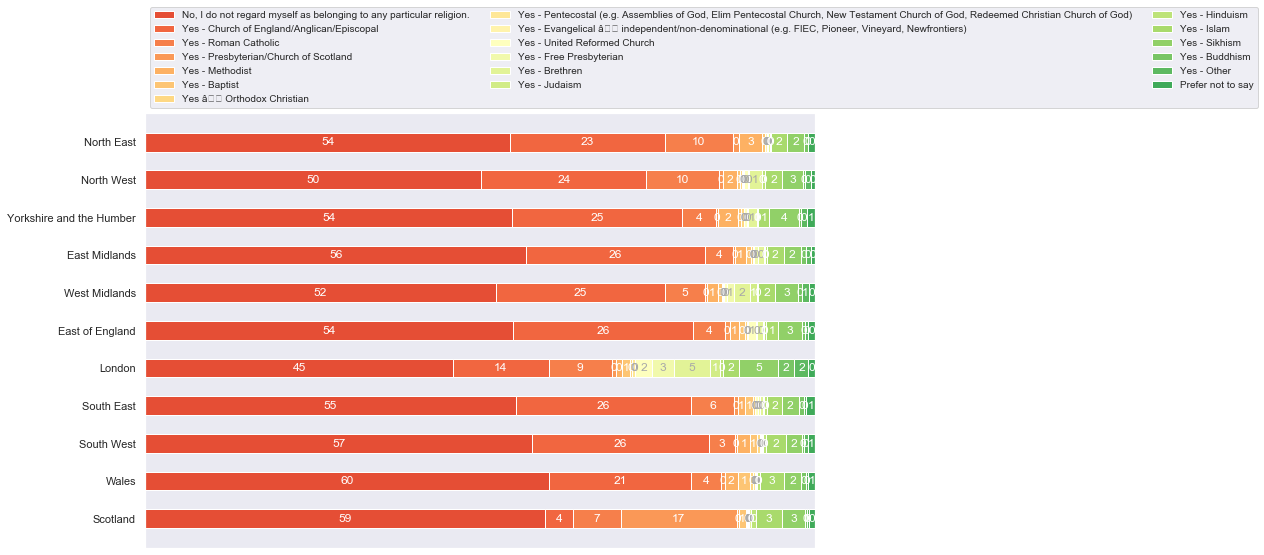

In [84]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_religionW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

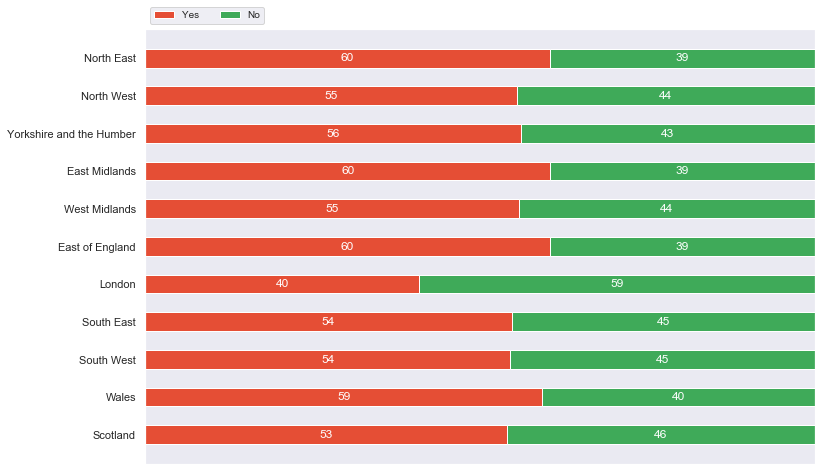

In [85]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_parentW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

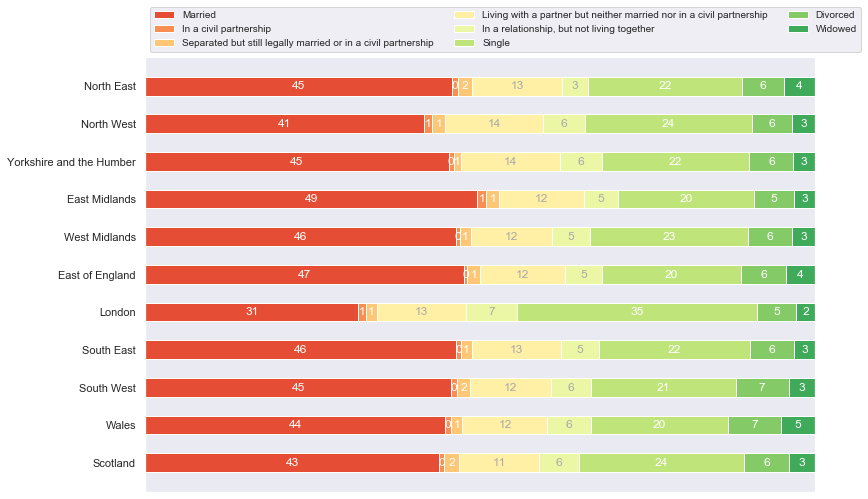

In [86]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_maritalW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

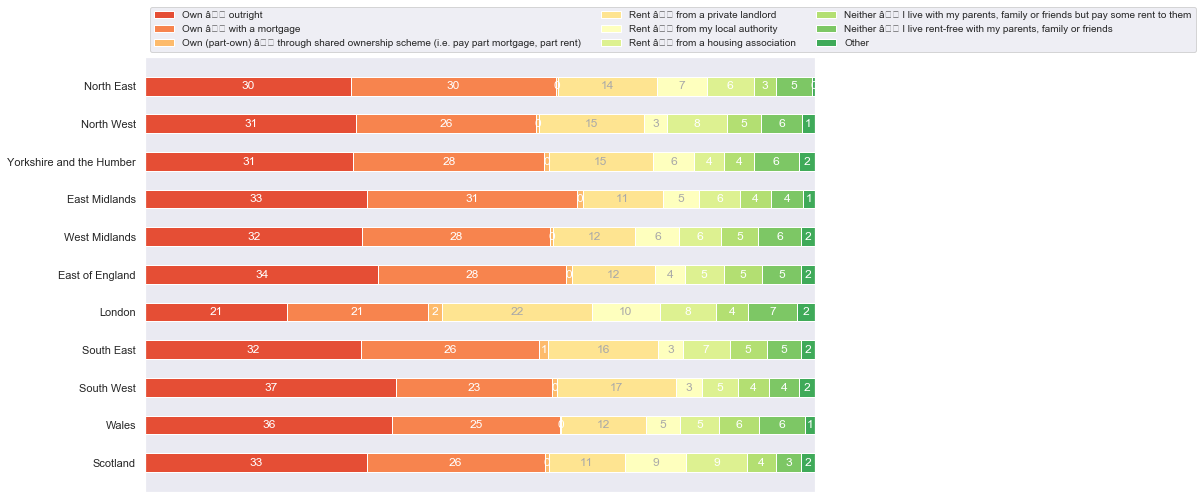

In [87]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_housingW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

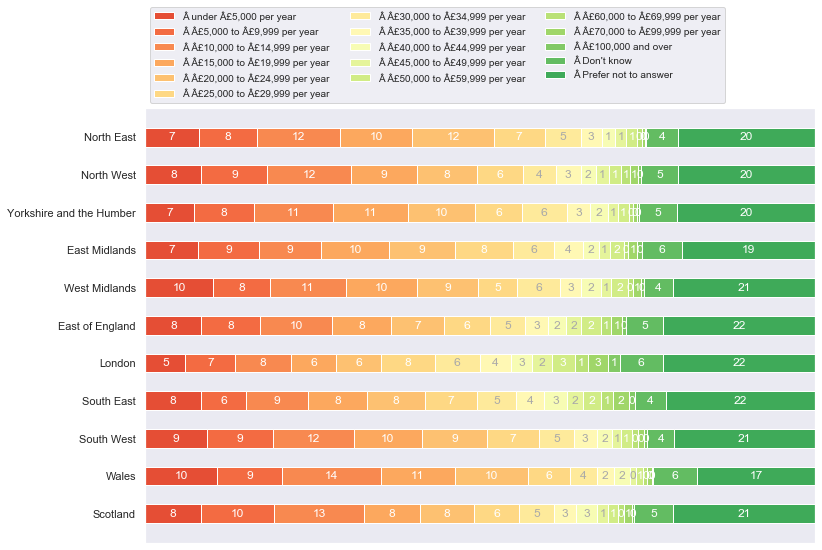

In [88]:

region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_gross_personalW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

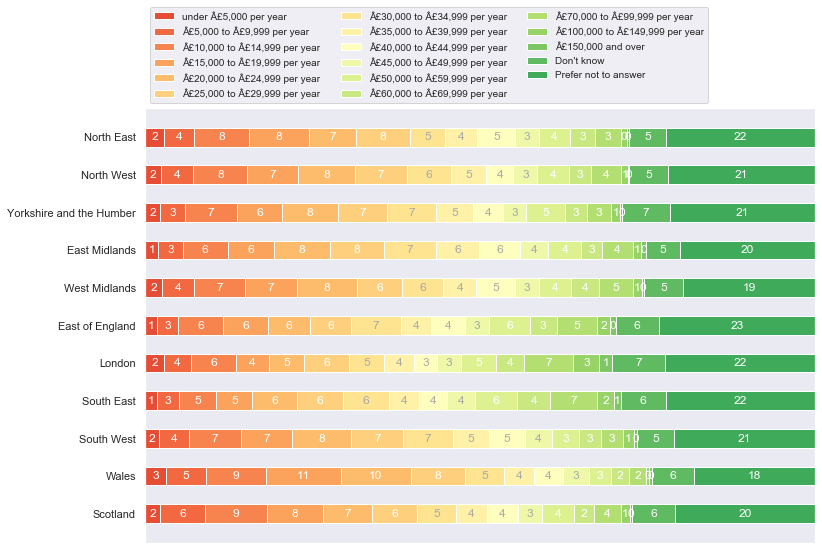

In [89]:

region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_gross_householdW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

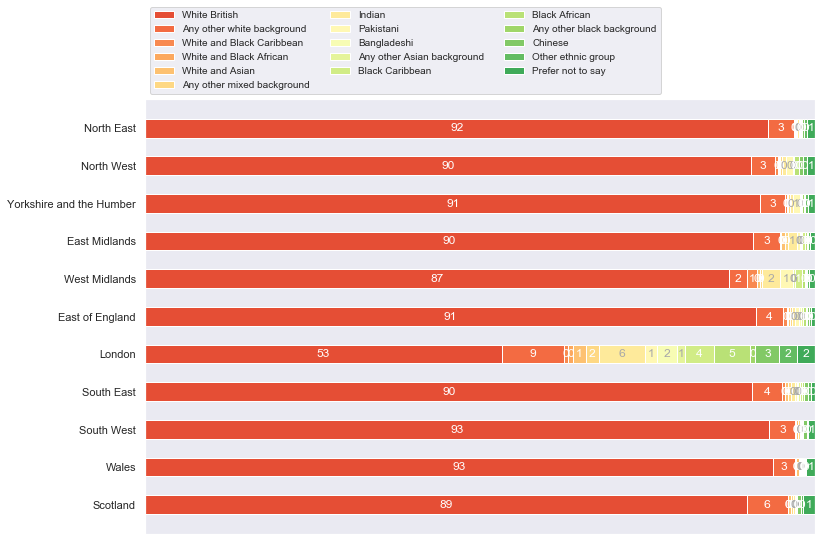

In [90]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_ethnicityW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

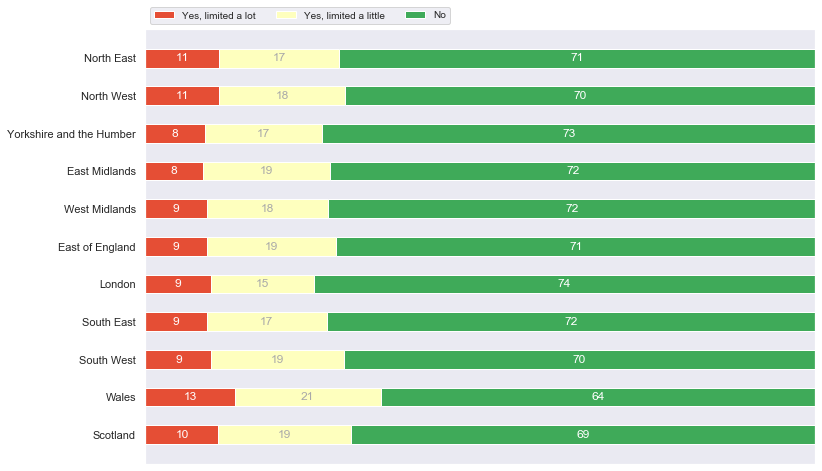

In [91]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_disabilityW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

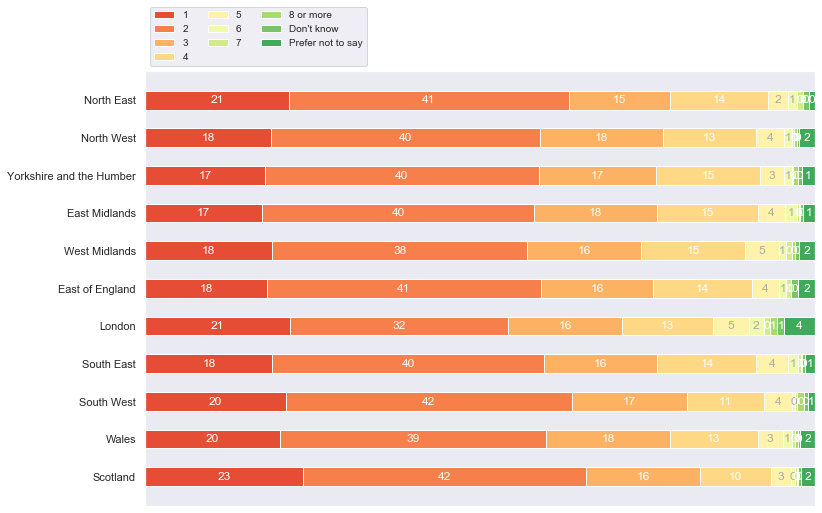

In [95]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_hh_sizeW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

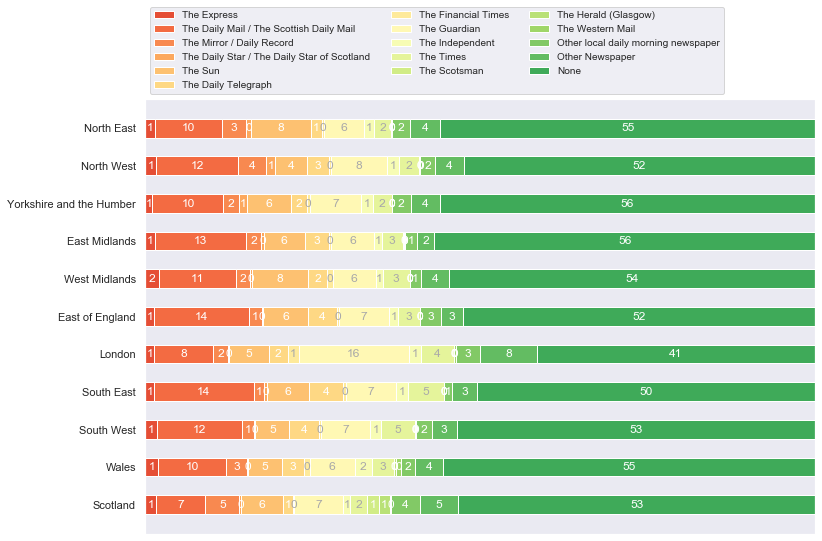

In [96]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["p_paper_readW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

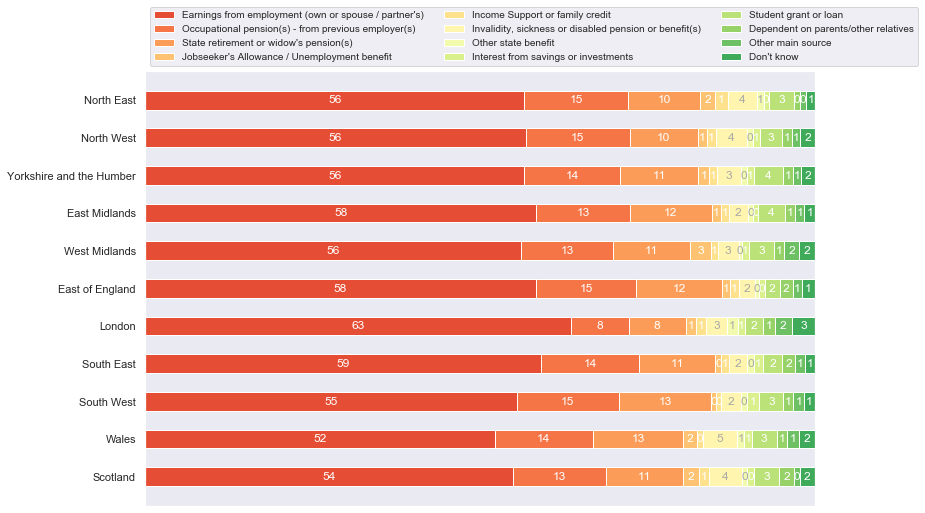

In [99]:
region_ser = BES_Panel["gorW11"]
split_ser = BES_Panel["mainSourceIncomeW11"]
wt_ser = BES_Panel["wt_new_W11"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

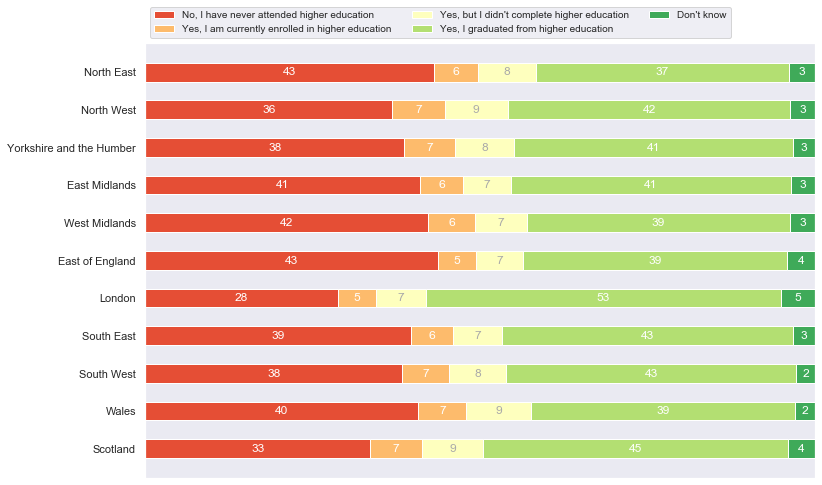

In [101]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["anyUniW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

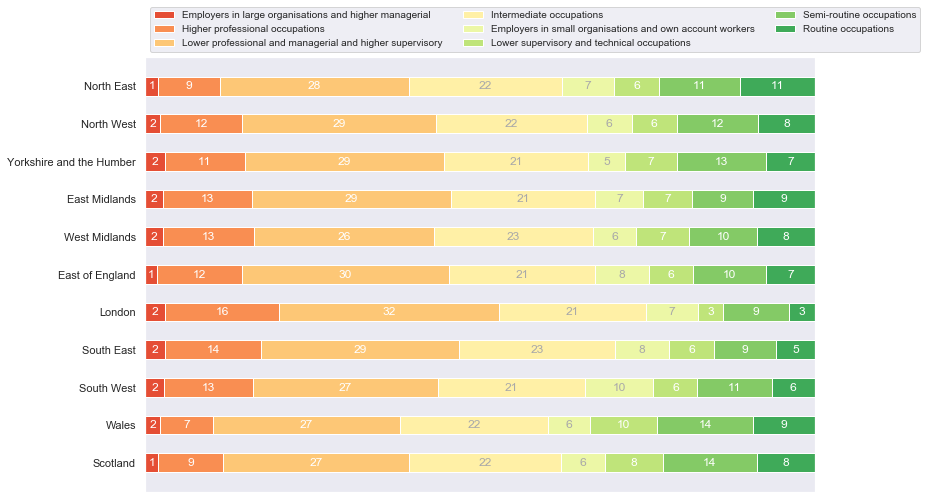

In [103]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["ns_sec_analyticW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

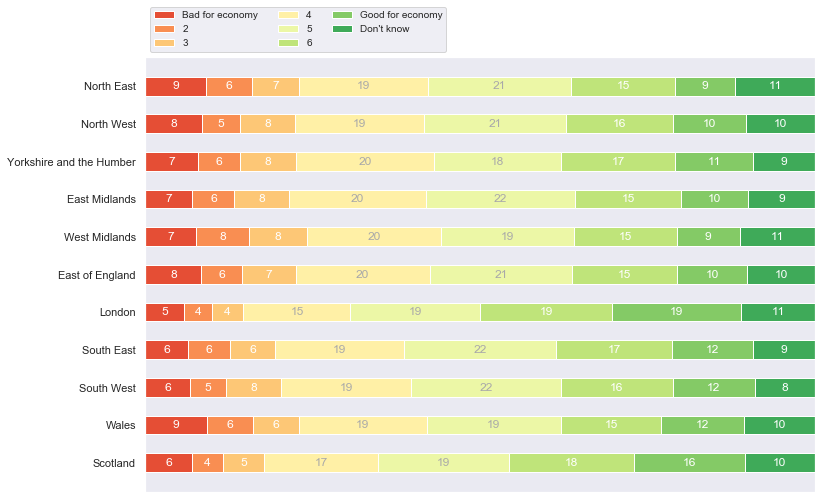

In [106]:
region_ser = BES_Panel["gorW17"]
split_ser = BES_Panel["immigEconW17"]
wt_ser = BES_Panel["wt_new_W17"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.show()

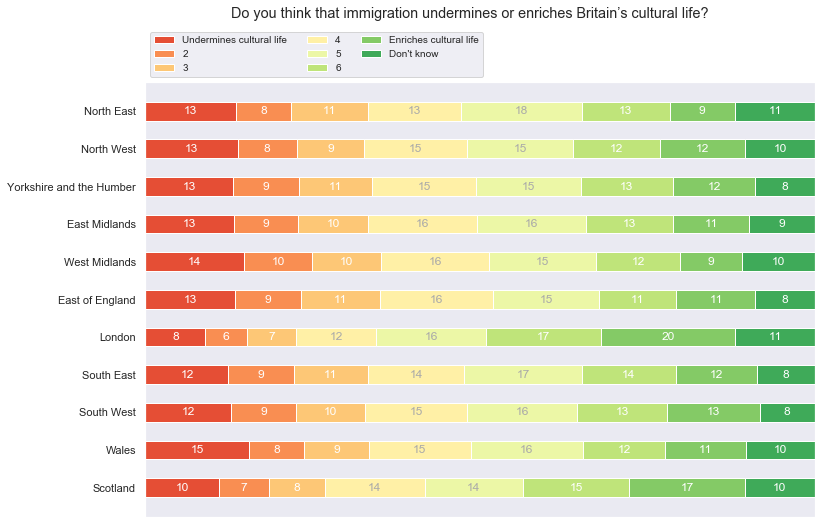

In [110]:
region_ser = BES_Panel["gorW17"]
split_ser = BES_Panel["immigCulturalW17"]
wt_ser = BES_Panel["wt_new_W17"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.suptitle("Do you think that immigration undermines or enriches Britain’s cultural life?",y=1.01);
plt.show()

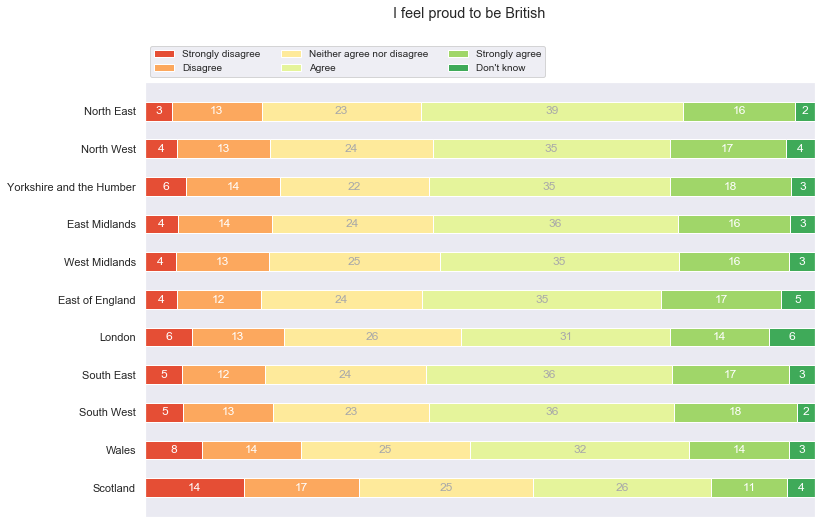

In [205]:
region_ser = BES_Panel["gorW17"]
split_ser = BES_Panel["britishPrideW17"]
wt_ser = BES_Panel["wt_new_W17"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.suptitle("I feel proud to be British",y=1.01);
plt.show()

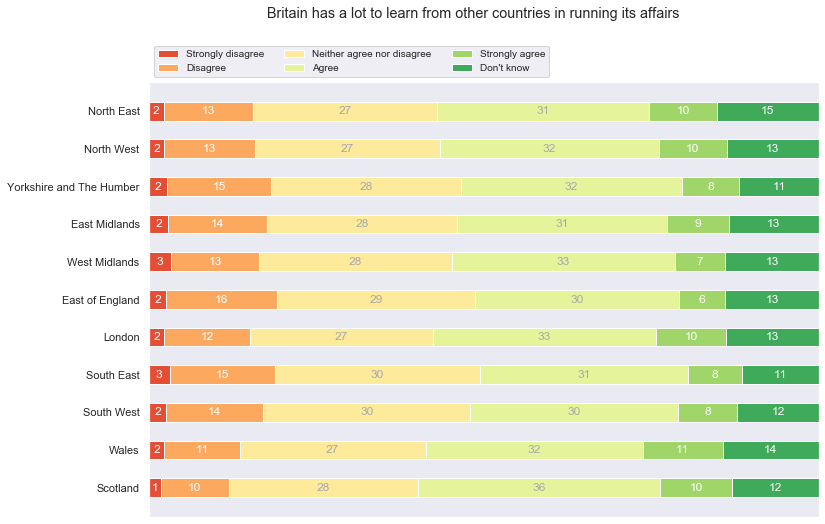

In [206]:
region_ser = BES_Panel["gorW10"]
split_ser = BES_Panel["ethno1W10"]
wt_ser = BES_Panel["wt_new_W10"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=3)
plt.suptitle("Britain has a lot to learn from other countries in running its affairs",y=1.01);
plt.show()

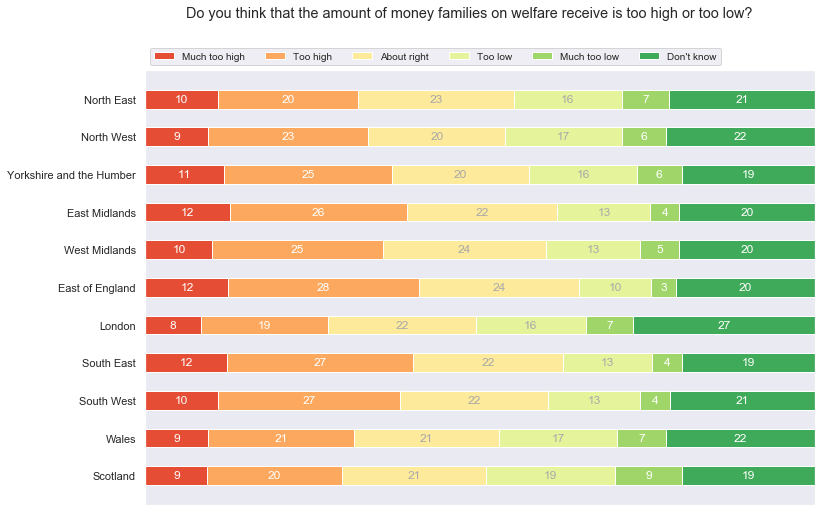

In [209]:

region_ser = BES_Panel["gorW11"]
split_ser = BES_Panel["welfarePreferenceW11"]
wt_ser = BES_Panel["wt_new_W11"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=6)
plt.suptitle("Do you think that the amount of money families on welfare receive is too high or too low?",y=0.99);
plt.show()

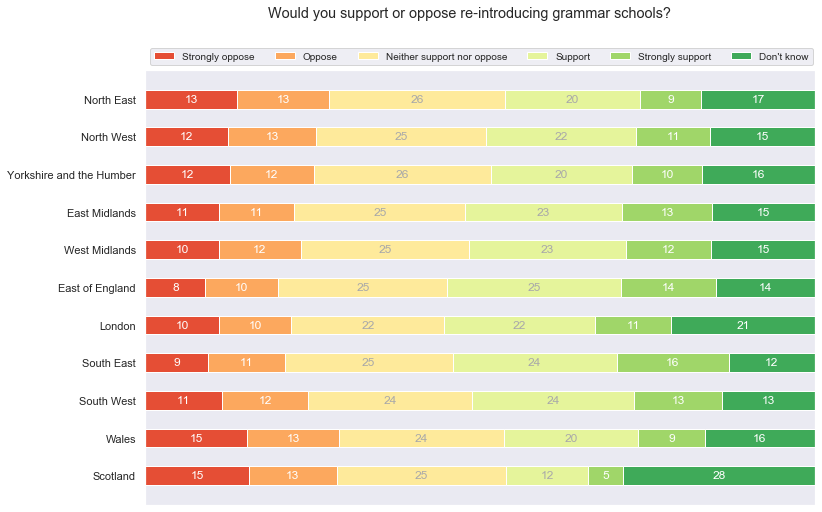

In [214]:
region_ser = BES_Panel["gorW11"]
split_ser = BES_Panel["grammarW11"]
wt_ser = BES_Panel["wt_new_W11"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=6)
plt.suptitle("Would you support or oppose re-introducing grammar schools?",y=0.99);
plt.show()

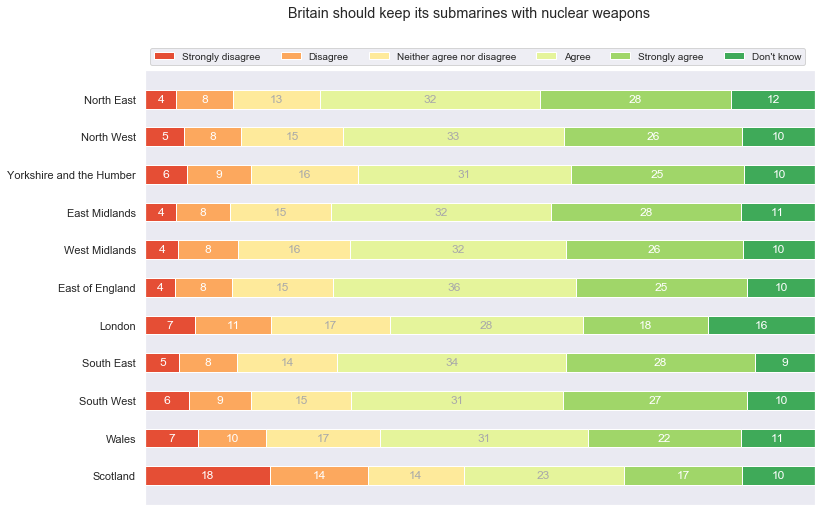

In [216]:
region_ser = BES_Panel["gorW12"]
split_ser = BES_Panel["keepNukesW12"]
wt_ser = BES_Panel["wt_new_W12"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=6)
plt.suptitle("Britain should keep its submarines with nuclear weapons",y=0.99);
# plt.show()

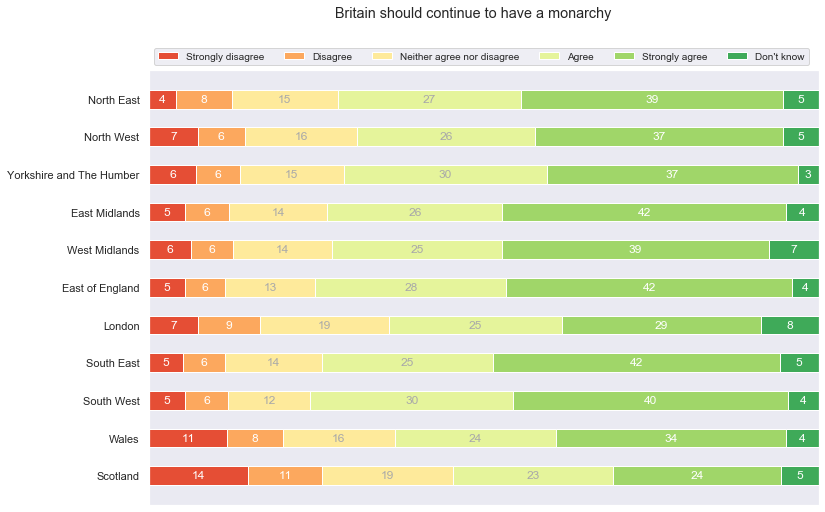

In [218]:
region_ser = BES_Panel["gorW8"]
split_ser = BES_Panel["monarchW8"]
wt_ser = BES_Panel["wt_new_W8"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=6)
plt.suptitle("Britain should continue to have a monarchy",y=0.99);
# plt.show()

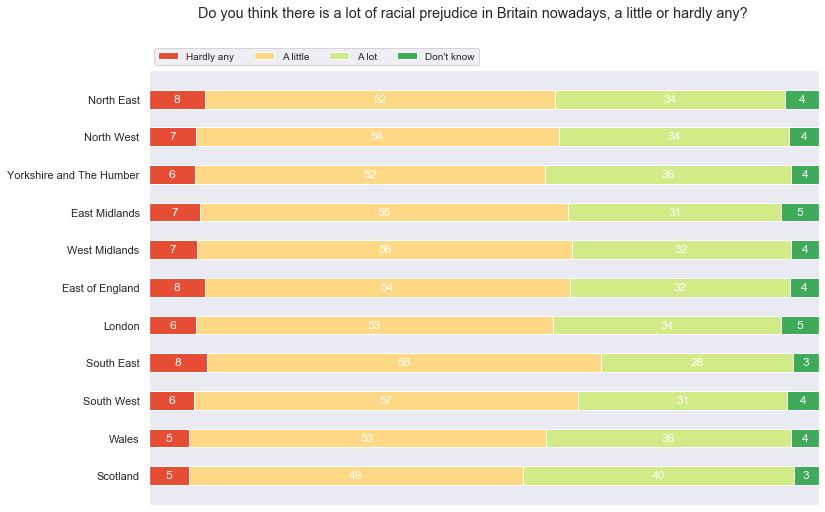

In [221]:
region_ser = BES_Panel["gorW4"]
split_ser = BES_Panel["racismAmountW4"]
wt_ser = BES_Panel["wt_full_W4"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=6)
plt.suptitle("Do you think there is a lot of racial prejudice in Britain nowadays, a little or hardly any?",y=0.99);
# plt.show()


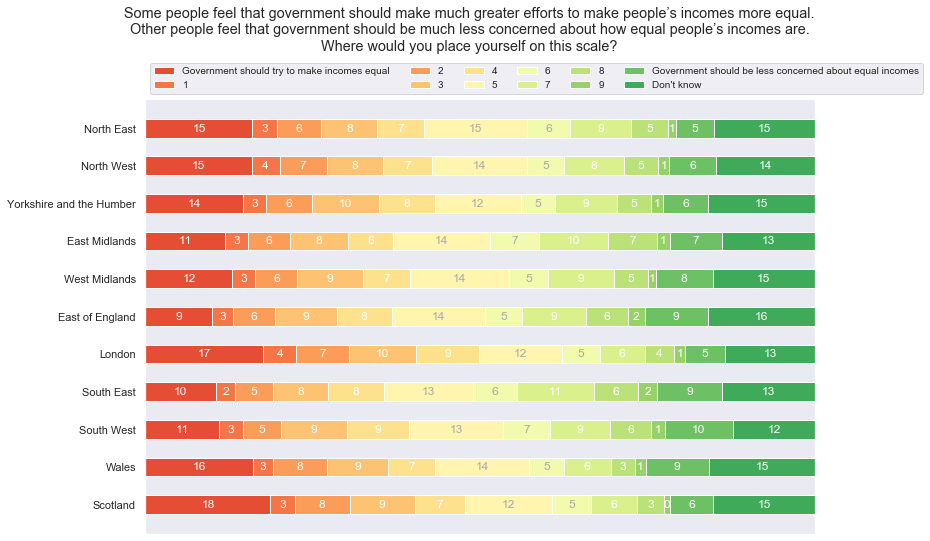

In [227]:
region_ser = BES_Panel["gorW19"]
split_ser = BES_Panel["redistSelfW19"]
wt_ser = BES_Panel["wt_new_W19_result"]
mask = region_ser.notnull()&split_ser.notnull()&wt_ser.notnull()

ct = pd.crosstab(index=region_ser[mask],
             columns=split_ser[mask],
             values=wt_ser[mask],
             aggfunc=sum, normalize = 'index')*100

category_names = split_ser.cat.categories
results = {k:list(v.values()) for k,v in ct.T.to_dict().items()}
survey(results, category_names,legend_col_max=6)
plt.suptitle("Some people feel that government should make much greater efforts to make people’s incomes more equal.\nOther people feel that government should be much less concerned about how equal people’s incomes are.\nWhere would you place yourself on this scale?",
             y=1.04);
# plt.show()


In [224]:
match(BES_Panel,"redistSelf")

redistSelfW1     30518
redistSelfW2     30238
redistSelfW3     27831
redistSelfW4     31530
redistSelfW6     30253
redistSelfW7     30895
redistSelfW10    30237
redistSelfW11    30956
redistSelfW12     8820
redistSelfW13    31136
redistSelfW14    31063
redistSelfW15    30842
redistSelfW16    37959
redistSelfW17    34366
redistSelfW18    37825
redistSelfW19    32177
dtype: int64

In [285]:
col_sums = BES_reduced_with_na[mask].notnull().sum()

In [289]:
%%time

gor_means = BES_reduced_with_na[BES_reduced_with_na.columns[col_sums>1000]][mask].astype('float32').groupby(BES_Panel["gorW19"][mask]).mean()

Wall time: 46.1 s


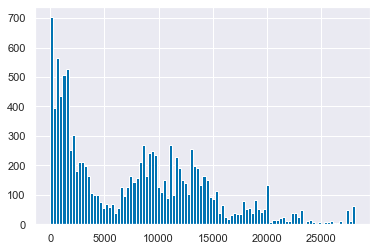

In [288]:
col_sums.hist(bins=100)

In [290]:
gor_val_means = pan_dataset_allr_values[[lr_col,al_col]][mask].astype('float32').groupby(BES_Panel["gorW19"][mask]).mean()

In [291]:
%%time
lr_corrs = gor_means.corrwith(gor_val_means["Economic: Left <-> Right{gaussian-ish}complete"])

Wall time: 11.5 s


In [292]:
df

Economic: Left <-> Right{gaussian-ish}complete  \
gorW19                                                                     
North East                                                     -0.147327   
North West                                                     -0.103072   
Yorkshire and The Humber                                       -0.043698   
East Midlands                                                   0.102818   
West Midlands                                                   0.034829   
East of England                                                 0.126738   
London                                                         -0.011226   
South East                                                      0.178592   
South West                                                      0.100208   
Wales                                                          -0.070934   
Scotland                                                       -0.174472   

                          Social: Liberalism <-> Conservatism{gaussian-ish}complete  \
gorW19                                                                                
North East                                                         0.255665           
North West                                                         0.170741           
Yorkshire and The Humber                                           0.168604           
East Midlands                                                      0.146607           
West Midlands                                                      0.187542           
East of England                                                    0.152742           
London                                                            -0.223427           
South East                                                         0.079625           
South West                                                         0.100863           
Wales                                                              0.036469           
Scotland                                                          -0.141343           

                          turnoutUKGeneralW1__Very likely that I will vote  \
gorW19                                                                       
North East                                                        3.580882   
North West                                                        3.607143   
Yorkshire and The Humber                                          3.600969   
East Midlands                                                     3.634546   
West Midlands                                                     3.637523   
East of England                                                   3.672083   
London                                                            3.699519   
South East                                                        3.696714   
South West                                                        3.687943   
Wales                                                             3.618020   
Scotland                                                          3.819970   

                          turnoutUKGeneralW2__Very likely that I will vote  \
gorW19                                                                       
North East                                                        3.663121   
North West                                                        3.688503   
Yorkshire and The Humber                                          3.661882   
East Midlands                                                     3.701658   
West Midlands                                                     3.709156   
East of England                                                   3.740057   
London                                                            3.788235   
South East                                                        3.779221   
South West                                                        3.755994   
Wales                           

In [293]:
df = pd.concat([gor_val_means,gor_means],axis=1)

In [281]:
df[pattern]

gorW19
North East                 -0.147327
North West                 -0.103072
Yorkshire and The Humber   -0.043698
East Midlands               0.102818
West Midlands               0.034829
East of England             0.126738
London                     -0.011226
South East                  0.178592
South West                  0.100208
Wales                      -0.070934
Scotland                   -0.174472
Name: Economic: Left <-> Right{gaussian-ish}complete, dtype: float32

In [294]:
%%time
# BES_reduced_with_na["trust_per_resp"] = trust_per_resp
pattern = "Economic: Left <-> Right{gaussian-ish}complete"
name = "Economic: Left <-> Right{gaussian-ish}complete"
corr_type = "spearman"
corr_df,corr_type = make_corr_summary(df, name, corr_type, pattern=pattern,min_sample_size=1)
display_corr(corr_df, name, corr_type, text_wrap_length=50)

Top 20 positive (spearman) correlations for Economic: Left <-> Right{gaussian-ish}complete r p N 
 
 pcBrexPrefW18__Leave with no deal 
 1.000000 
 0.00 
 3 
 
 
 redistSelfW7__Government should be less concerned[...] 
 1.000000 
 0.00 
 11 
 
 
 approveUKGovtW2__Strongly approve 
 0.990000 
 0.00 
 11 
 
 
 conGovTrustW5__ Would do a good job 
 0.980000 
 0.00 
 11 
 
 
 likeCameronW4__Strongly like 
 0.980000 
 0.00 
 11 
 
 
 generalElectionVoteW5_Conservative 
 0.980000 
 0.00 
 11 
 
 
 lr_scaleW13__Right 
 0.980000 
 0.00 
 11 
 
 
 mpPartyW4_Conservative 
 0.980000 
 0.00 
 11 
 
 
 immigLDW11__Allow many more 
 0.980000 
 0.00 
 11 
 
 
 changeImmigLabW4__Getting a lot higher 
 0.980000 
 0.00 
 11 
 
 
 likeConW3__Strongly like 
 0.980000 
 0.00 
 11 
 
 
 winConstituencyConW5__100 - Very likely to win 
 0.980000 
 0.00 
 11 
 
 
 partyIdW4_Conservative 
 0.970000 
 0.00 
 11 
 
 
 labFearW6_Yes 
 0.970000 
 0.00 
 11 
 
 
 preferLabCoalitionW4__Ranked fifth 
 0.970000 
 0.00 
 11 
 
 
 conLookAfterWCW10__Very closely 
 0.960000 
 0.00 
 11 
 
 
 likeMayW9__Strongly like 
 0.960000 
 0.00 
 11 
 
 
 bestOnMIIW5_Conservative 
 0.960000 
 0.00 
 11 
 
 
 changeEconomyW3__Getting a lot better 
 0.960000 
 0.00 
 11 
 
 
 ptvConW6__Very likely 
 0.960000 
 0.00 
 11 
 
 Top 20 negative (spearman) correlations for Economic: Left <-> Right{gaussian-ish}complete r p N 
 
 lr3W16__Strongly agree 
 -1.000000 
 0.00 
 11 
 
 
 cutsTooFarNationalW6__Gone much too far 
 -0.990000 
 0.00 
 11 
 
 
 lr2W14W15__Strongly agree 
 -0.990000 
 0.00 
 11 
 
 
 lr4W17__Strongly agree 
 -0.990000 
 0.00 
 11 
 
 
 lr1W1W2W3W4W5__Strongly agree 
 -0.990000 
 0.00 
 11 
 
 
 changeEconomyLabW12__Getting a lot better 
 -0.980000 
 0.00 
 11 
 
 
 preferConCoalitionW5__Ranked fifth 
 -0.970000 
 0.00 
 11 
 
 
 preferConMajorityW4__Ranked fifth 
 -0.970000 
 0.00 
 11 
 
 
 privatTooFarW7__Gone much too far 
 -0.970000 
 0.00 
 11 
 
 
 labLookAfterMCW12__Very closely 
 -0.960000 
 0.00 
 11 
 
 
 bestPMW12_Jeremy Corbyn 
 -0.960000 
 0.00 
 11 
 
 
 redistLDW3__Government should be less concerned[...] 
 -0.950000 
 0.00 
 11 
 
 
 responsibleDebtUKBanksW3_Yes 
 -0.950000 
 0.00 
 11 
 
 
 conAngryW4_Yes 
 -0.950000 
 0.00 
 11 
 
 
 pidMyPartyW13__Strongly agree 
 -0.950000 
 0.00 
 11 
 
 
 lr5W13__Strongly agree 
 -0.950000 
 0.00 
 11 
 
 
 expectGoodConductGeneralW11__Expect 20xx election[...] 
 -0.950000 
 0.00 
 11 
 
 
 likeCorbynW12__Strongly like 
 -0.950000 
 0.00 
 11 
 
 
 responsibleDebtConservativesW4_Yes 
 -0.950000 
 0.00 
 11 
 
 
 localElectionVoteW2_Labour 
 -0.950000 
 0.00 
 11

Wall time: 35.4 s


In [306]:


%%time
# BES_reduced_with_na["trust_per_resp"] = trust_per_resp
pattern = "Economic: Left <-> Right{gaussian-ish}complete"
name = "Economic: Left <-> Right{gaussian-ish}complete"
corr_type = "spearman"
corr_df,corr_type = make_corr_summary(df[list(gor_val_means.columns) + list(match(BES_reduced_with_na,demog_var).index)],
                                      name, corr_type, pattern=pattern,min_sample_size=1)
display_corr(corr_df, name, corr_type, text_wrap_length=50)

Top 20 positive (spearman) correlations for Economic: Left <-> Right{gaussian-ish}complete r p N 
 
 gorW10_East of England 
 0.760000 
 0.01 
 11 
 
 
 profile_house_tenure_Own (part-own) through shared[...] 
 0.740000 
 0.01 
 11 
 
 
 allSourceIncome_8W11_Yes 
 0.740000 
 0.01 
 11 
 
 
 profile_work_typeW7W10_Clerical/junior[...] 
 0.720000 
 0.01 
 11 
 
 
 motherCountryBornW8_EU: pre-2004 
 0.710000 
 0.01 
 11 
 
 
 educationW8W9W10_Scottish Higher Certificate 
 -0.710000 
 0.01 
 11 
 
 
 educationW8W9W10_University diploma 
 -0.860000 
 0.00 
 11 
 
 Top 20 negative (spearman) correlations for Economic: Left <-> Right{gaussian-ish}complete r p N 
 
 educationW8W9W10_University diploma 
 -0.860000 
 0.00 
 11 
 
 
 educationW8W9W10_Scottish Higher Certificate 
 -0.710000 
 0.01 
 11 
 
 
 motherCountryBornW8_EU: pre-2004 
 0.710000 
 0.01 
 11 
 
 
 profile_work_typeW7W10_Clerical/junior[...] 
 0.720000 
 0.01 
 11 
 
 
 profile_house_tenure_Own (part-own) through shared[...] 
 0.740000 
 0.01 
 11 
 
 
 allSourceIncome_8W11_Yes 
 0.740000 
 0.01 
 11 
 
 
 gorW10_East of England 
 0.760000 
 0.01 
 11

Wall time: 1.63 s


In [307]:
df[list(gor_val_means.columns) + list(match(BES_reduced_with_na,demog_var).index)]

Economic: Left <-> Right{gaussian-ish}complete  \
gorW19                                                                     
North East                                                     -0.147327   
North West                                                     -0.103072   
Yorkshire and The Humber                                       -0.043698   
East Midlands                                                   0.102818   
West Midlands                                                   0.034829   
East of England                                                 0.126738   
London                                                         -0.011226   
South East                                                      0.178592   
South West                                                      0.100208   
Wales                                                          -0.070934   
Scotland                                                       -0.174472   

                          Social: Liberalism <-> Conservatism{gaussian-ish}complete  \
gorW19                                                                                
North East                                                         0.255665           
North West                                                         0.170741           
Yorkshire and The Humber                                           0.168604           
East Midlands                                                      0.146607           
West Midlands                                                      0.187542           
East of England                                                    0.152742           
London                                                            -0.223427           
South East                                                         0.079625           
South West                                                         0.100863           
Wales                                                              0.036469           
Scotland                                                          -0.141343           

                          anyUniW10__Yes, I graduated from higher education  \
gorW19                                                                        
North East                                                         1.389299   
North West                                                         1.607704   
Yorkshire and The Humber                                           1.574331   
East Midlands                                                      1.488739   
West Midlands                                                      1.556139   
East of England                                                    1.372988   
London                                                             1.827055   
South East                                                         1.636737   
South West                                                         1.600343   
Wales                                                              1.687093   
Scotland                                                           1.836869   

                          edlevelW8W9W10__Postgrad        Age  \
gorW19                                                          
North East                                2.886792  53.418423   
North West                                2.984159  52.605293   
Yorkshire and The Humber                  3.042056  51.962093   
East Midlands                             2.940850  53.279846   
West Midlands                             2.930443  52.479607   
East of England                           2.872727  53.416767   
London                                    3.384134  48.999405   
South East                                3.077404  52.592037   
South West                                3.052558  54.253216   
Wales                                     3.171574  54.569191   
Scotland                                  3.295547  52.722221   

                          profi

In [299]:
demog_var = "travelEU|passportUK|passportOther|passportExpired|passportNever|livedAbroad|friendsEU|parentsForeign|motherCountryBorn|fatherCountryBorn"
demog_var = "|".join([demog_var,"ukCitizenW14|euCitizenW14|commonwealthCitizenW14|otherCitizenW14"])
demog_var = "|".join([demog_var,"gorW10|countryOfBirth[^W]|educationW8W9W10|profile_education_age[^W]|edlevelW8W9W10|anyUniW10"])
demog_var = "|".join([demog_var,"privPrimSchlW1_W4W7W9_W12W14W15|privScndSchlW1_W4W7W9_W12W14W15|neverPrivSchlW1_W4W7W9_W12W14W15|prvSchDKW1_W4W7W9_W12W14W15"])
demog_var = "|".join([demog_var,"marital|gender[^R]|disability[^W]|profile_ethnicity[^2W]|Age|profile_religion[^W]|profile_sexualityW10"])
demog_var = "|".join([demog_var,"profile_household_size[^W]|profile_household_children[^W]"])
demog_var = "|".join([demog_var,"preschoolKidsInHouseW6_W14|preschoolKidsInHouseW6_W14|sickElderlyInHouseW6_W14|noDependentsInHouseW6_W14"])
demog_var = "|".join([demog_var,"profile_gross_household[^W]|profile_gross_personal[^W]|profile_house_tenure[^W]|allSourceIncome_\d+W11"])
demog_var = "|".join([demog_var,"profile_work_typeW7W10|workingStatusW6_W12|ns_sec_analyticW6W7W8W9|profile_socgradeW8"])
demog_var

'travelEU|passportUK|passportOther|passportExpired|passportNever|livedAbroad|friendsEU|parentsForeign|motherCountryBorn|fatherCountryBorn|ukCitizenW14|euCitizenW14|commonwealthCitizenW14|otherCitizenW14|gorW10|countryOfBirth[^W]|educationW8W9W10|profile_education_age[^W]|edlevelW8W9W10|anyUniW10|privPrimSchlW1_W4W7W9_W12W14W15|privScndSchlW1_W4W7W9_W12W14W15|neverPrivSchlW1_W4W7W9_W12W14W15|prvSchDKW1_W4W7W9_W12W14W15|marital|gender[^R]|disability[^W]|profile_ethnicity[^2W]|Age|profile_religion[^W]|profile_sexualityW10|profile_household_size[^W]|profile_household_children[^W]|preschoolKidsInHouseW6_W14|preschoolKidsInHouseW6_W14|sickElderlyInHouseW6_W14|noDependentsInHouseW6_W14|profile_gross_household[^W]|profile_gross_personal[^W]|profile_house_tenure[^W]|allSourceIncome_\\d+W11|profile_work_typeW7W10|workingStatusW6_W12|ns_sec_analyticW6W7W8W9|profile_socgradeW8'

In [ ]:
list(match(BES_reduced_with_na,demog_var).index)

In [301]:
lr_corrs.loc[match(BES_reduced_with_na,demog_var).index].sort_values()

educationW8W9W10_University diploma                                                                                                               -0.830492
workingStatusW6_W12_Unemployed and looking for work                                                                                               -0.736713
allSourceIncome_6W11_Yes                                                                                                                          -0.594511
motherCountryBornW8_East Asia                                                                                                                     -0.579965
educationW8W9W10_Nursing qualification (eg SEN, SRN, SCM, RGN)                                                                                    -0.560963
                                                                                                                                                     ...   
workingStatusW6_W12_Working part time (8-29 hours a week)       

In [311]:
search(BES_Panel,"wt_new")

wt_new_W10           30237
wt_new_W11           30956
wt_new_W14           31063
wt_new_W15           30842
wt_new_W16           37959
wt_new_W1_W16         2427
wt_new_W18           37825
wt_new_W6W7          21081
wt_new_W2W6          23163
wt_new_W2W6W7        17076
wt_new_W9_W13        12562
wt_new_W12           34394
wt_new_W1_W11         6473
wt_new_W1_W12         5833
wt_new_W1_W13         5301
wt_new_W6_W11         9373
wt_new_W6_W12         8398
wt_new_W6_W13         7622
wt_new_W11_W13       21520
wt_new_W13W16        14647
wt_new_W13_result    31135
wt_new_W6W16          9587
wt_new_W2W16          8388
wt_new_W17           34366
wt_new_W13W17        15744
wt_new_W6W13W19       8743
wt_new_W9W19         13604
wt_new_W13_W19        5861
wt_new_W13W19        15811
wt_new_W16W19        21840
wt_new_W17W18W19     19000
wt_new_W19_result    32177
wt_new_W9            30036
wt_new_W8            33502
wt_new_W7            30895
wt_new_W6            30073
wt_new_W13W14        20393
w

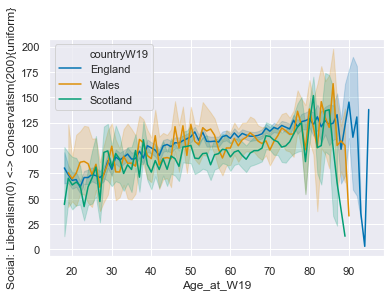

In [120]:
df = pd.DataFrame()

df["Age_at_W19"] = pan_dataset_ages["Age_at_W19"].round()
df["countryW19"] = BES_Panel["countryW19"].replace({1:"England",2:"Scotland",3:"Wales"}).astype('category')
df["Social: Liberalism(0) <-> Conservatism(200){uniform}"] = pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"]
df["Economic: Left(0) <-> Right(200){uniform}"] = pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"]
sns.lineplot(data=df, x="Age_at_W19",hue="countryW19",y="Social: Liberalism(0) <-> Conservatism(200){uniform}");

In [123]:
pan_dataset_ages["equalisedAgeGroup_at_W19_detailed"]

id
1         (63.0, 67.0]
2         (67.0, 71.0]
3        (75.0, 106.0]
4         (55.0, 59.0]
5         (71.0, 75.0]
             ...      
98447     (28.0, 33.0]
98448     (28.0, 33.0]
98449     (33.0, 37.0]
98450     (24.0, 28.0]
98451     (41.0, 46.0]
Name: equalisedAgeGroup_at_W19_detailed, Length: 97006, dtype: category
Categories (14, interval[float64]): [(17.0, 24.0] < (24.0, 28.0] < (28.0, 33.0] < (33.0, 37.0] ... (63.0, 67.0] < (67.0, 71.0] < (71.0, 75.0] < (75.0, 106.0]]

In [139]:
BES_Panel[match(BES_Panel,"countryW\d+").index] = BES_Panel[match(BES_Panel,"countryW\d+").index].replace({1:"England",2:"Scotland",3:"Wales"})

In [144]:
def nicer_age_category_labels(ser):
    return ser.cat.rename_categories( ["("+str(int(x.left))+"-"+str(int(x.right))+"]" for x in ser.cat.categories] )

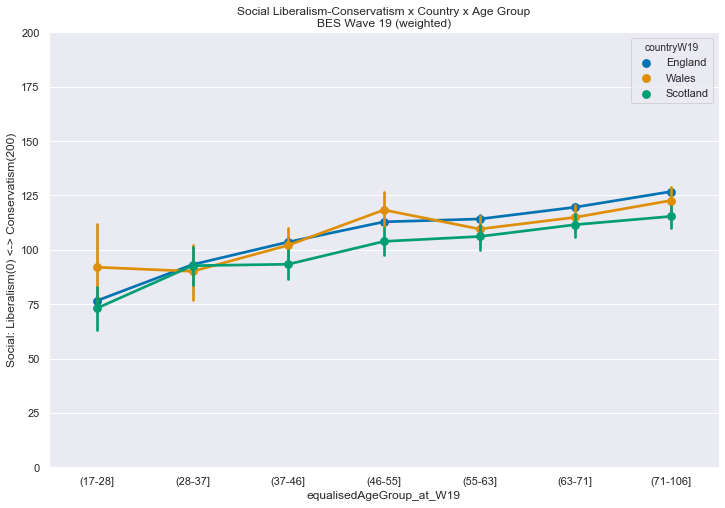

In [171]:
like_var = "Social: Liberalism(0) <-> Conservatism(200)"
wt_var = "wt_new_W19_result"
vote_var = "equalisedAgeGroup_at_W19"
euref_var = "countryW19"

df = pd.DataFrame()
df[euref_var] = BES_Panel[euref_var]
df[vote_var] = nicer_age_category_labels( pan_dataset_ages[vote_var] )
df[like_var+"_num_wts"] = list(zip(pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"],
                                              BES_Panel[wt_var]))
mask = df[euref_var].notnull()&df[vote_var].notnull()&BES_Panel[wt_var].notnull()&\
            pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"].notnull()

df=df[mask]
# df = BES_Panel.groupby([nicer_age_category_labels( pan_dataset_ages[vote_var] ),
#                         BES_Panel[euref_var]])[like_var+"_num_wts"].agg(weighted_mean).reset_index()


# df[wt_var] = BES_Panel
# df = df.replace(replace_dict)
plt.figure(figsize=(12,8));
ax = sns.pointplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df, estimator=weighted_mean,
                   n_boot=1000,orient='v',alpha=.8);
plt.ylim([0,200]);
# ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
# raw_sample_sizes = BES_Panel.groupby([nicer_age_category_labels( pan_dataset_ages[vote_var] ),
#                                       BES_Panel[euref_var]])[like_var+"_num_wts"].count().sort_index(level=1).values

# Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
# count = 0
# for p in ax.patches:
# #     ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
# #             fontsize=10, color='red', ha='center', va='bottom')
#     ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
#             fontsize=10, color='black', ha='center', va='bottom', rotation=90)
#     count = count + 1
plt.ylabel(like_var);
plt.title("Social Liberalism-Conservatism x Country x Age Group\nBES Wave 19 (weighted)");

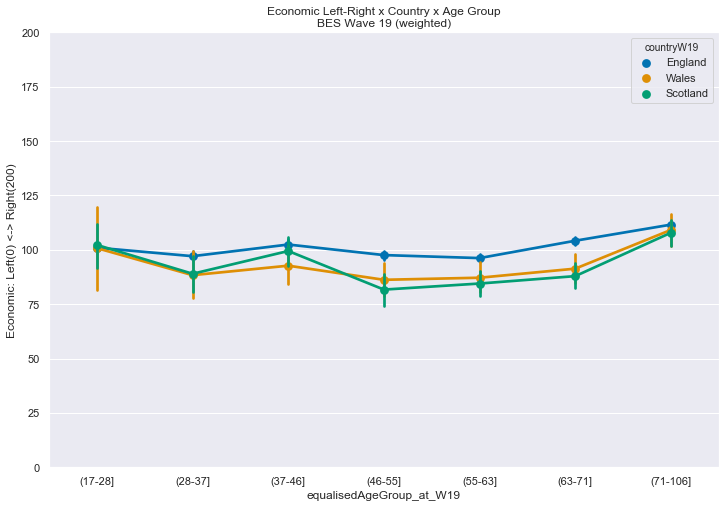

In [172]:
like_var = "Economic: Left(0) <-> Right(200)"
wt_var = "wt_new_W19_result"
vote_var = "equalisedAgeGroup_at_W19"
euref_var = "countryW19"

df = pd.DataFrame()
df[euref_var] = BES_Panel[euref_var]
df[vote_var] = nicer_age_category_labels( pan_dataset_ages[vote_var] )
df[like_var+"_num_wts"] = list(zip(pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"],
                                              BES_Panel[wt_var]))
mask = df[euref_var].notnull()&df[vote_var].notnull()&BES_Panel[wt_var].notnull()&\
            pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"].notnull()

df=df[mask]

# df = BES_Panel.groupby([nicer_age_category_labels( pan_dataset_ages[vote_var] ),
#                         BES_Panel[euref_var]])[like_var+"_num_wts"].agg(weighted_mean).reset_index()


# df[wt_var] = BES_Panel
# df = df.replace(replace_dict)
plt.figure(figsize=(12,8));
ax = sns.pointplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df, estimator=weighted_mean,
                   n_boot=1000,orient='v',alpha=.8);
plt.ylim([0,200]);
# ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
# raw_sample_sizes = BES_Panel.groupby([nicer_age_category_labels( pan_dataset_ages[vote_var] ),
#                                       BES_Panel[euref_var]])[like_var+"_num_wts"].count().sort_index(level=1).values

# Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
# count = 0
# for p in ax.patches:
# #     ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
# #             fontsize=10, color='red', ha='center', va='bottom')
#     ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
#             fontsize=10, color='black', ha='center', va='bottom', rotation=90)
#     count = count + 1
plt.ylabel(like_var);
plt.title("Economic Left-Right x Country x Age Group\nBES Wave 19 (weighted)");

<Figure size 864x576 with 0 Axes>

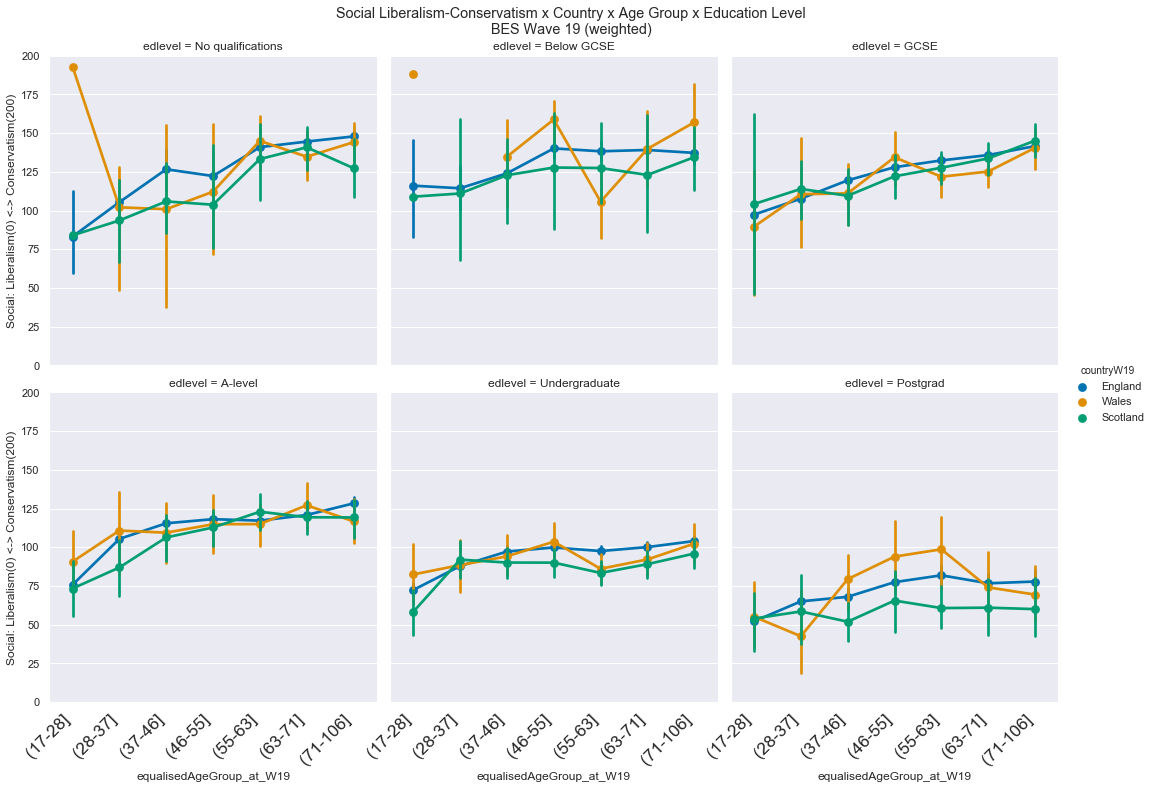

In [163]:
like_var = "Social: Liberalism(0) <-> Conservatism(200)"
wt_var = "wt_new_W19_result"
vote_var = "equalisedAgeGroup_at_W19"
euref_var = "countryW19"

df = pd.DataFrame()
df[euref_var] = BES_Panel[euref_var]
df[vote_var] = nicer_age_category_labels( pan_dataset_ages[vote_var] )
df[like_var] = list(zip(pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"],
                                              BES_Panel[wt_var]))
df["edlevel"] = BES_Panel["p_edlevelUniW19"]
mask = df[euref_var].notnull()&df[vote_var].notnull()&BES_Panel[wt_var].notnull()&df["edlevel"].notnull()&\
            pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"].notnull()

df=df[mask]

# df = BES_Panel.groupby([nicer_age_category_labels( pan_dataset_ages[vote_var] ),
#                         BES_Panel[euref_var]])[like_var+"_num_wts"].agg(weighted_mean).reset_index()


# df[wt_var] = BES_Panel
# df = df.replace(replace_dict)
plt.figure(figsize=(12,8));
# ax = sns.pointplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df, estimator=weighted_mean,
#                    n_boot=1000,orient='v');

chart = sns.catplot(x=vote_var, y= like_var, hue=euref_var, col='edlevel', kind="point", data=df, col_wrap=3,
                   estimator=weighted_mean,n_boot=1000,orient='v');

plt.suptitle("Social Liberalism-Conservatism x Country x Age Group x Education Level\nBES Wave 19 (weighted)",y=1.03);
for axes in chart.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize='x-large')


plt.ylim([0,200]);
# ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
# raw_sample_sizes = BES_Panel.groupby([nicer_age_category_labels( pan_dataset_ages[vote_var] ),
#                                       BES_Panel[euref_var]])[like_var+"_num_wts"].count().sort_index(level=1).values

# Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
# count = 0
# for p in ax.patches:
# #     ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
# #             fontsize=10, color='red', ha='center', va='bottom')
#     ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
#             fontsize=10, color='black', ha='center', va='bottom', rotation=90)
#     count = count + 1
# plt.ylabel(like_var);
# plt.title("Economic Left-Right x Country x Age Group\nBES Wave 19 (weighted)");

<Figure size 864x576 with 0 Axes>

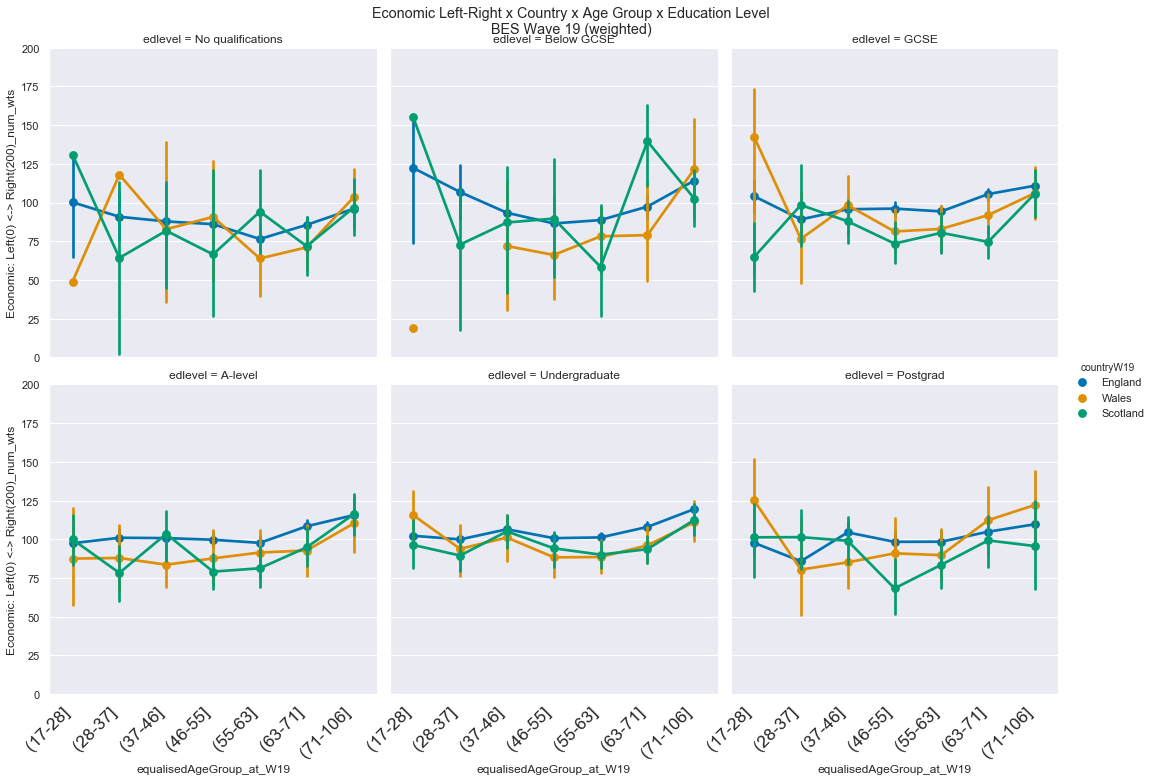

In [164]:
like_var = "Economic: Left(0) <-> Right(200)"
wt_var = "wt_new_W19_result"
vote_var = "equalisedAgeGroup_at_W19"
euref_var = "countryW19"

df = pd.DataFrame()
df[euref_var] = BES_Panel[euref_var]
df[vote_var] = nicer_age_category_labels( pan_dataset_ages[vote_var] )
df[like_var+"_num_wts"] = list(zip(pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"],
                                              BES_Panel[wt_var]))
df["edlevel"] = BES_Panel["p_edlevelUniW19"]
mask = df[euref_var].notnull()&df[vote_var].notnull()&BES_Panel[wt_var].notnull()&df["edlevel"].notnull()&\
            pan_dataset_allr_values["Economic: Left(0) <-> Right(200){uniform}"].notnull()

df=df[mask]

# df = BES_Panel.groupby([nicer_age_category_labels( pan_dataset_ages[vote_var] ),
#                         BES_Panel[euref_var]])[like_var+"_num_wts"].agg(weighted_mean).reset_index()


# df[wt_var] = BES_Panel
# df = df.replace(replace_dict)
plt.figure(figsize=(12,8));
# ax = sns.pointplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df, estimator=weighted_mean,
#                    n_boot=1000,orient='v');

chart = sns.catplot(x=vote_var, y= like_var+"_num_wts", hue=euref_var, col='edlevel', kind="point", data=df, col_wrap=3,
                   estimator=weighted_mean,n_boot=1000,orient='v');

plt.suptitle("Economic Left-Right x Country x Age Group x Education Level\nBES Wave 19 (weighted)",y=1.02);
for axes in chart.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize='x-large')


plt.ylim([0,200]);
# ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
# raw_sample_sizes = BES_Panel.groupby([nicer_age_category_labels( pan_dataset_ages[vote_var] ),
#                                       BES_Panel[euref_var]])[like_var+"_num_wts"].count().sort_index(level=1).values

# Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
# count = 0
# for p in ax.patches:
# #     ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
# #             fontsize=10, color='red', ha='center', va='bottom')
#     ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
#             fontsize=10, color='black', ha='center', va='bottom', rotation=90)
#     count = count + 1
# plt.ylabel(like_var);
# plt.title("Economic Left-Right x Country x Age Group\nBES Wave 19 (weighted)");

In [166]:
search(BES_Panel,"p_education_age|anyUni")

anyUniW7              30895
anyUniW9              30036
anyUniW10             30237
anyUniW11             30956
anyUniW12             34394
anyUniW13             31136
anyUniW14             31063
anyUniW15             30842
anyUniW16             37959
anyUniW17              3564
anyUniW19             32177
p_education_ageW1     30379
p_education_ageW2     30239
p_education_ageW3     28119
p_education_ageW4     31294
p_education_ageW5     30787
p_education_ageW6     30119
p_education_ageW7     29939
p_education_ageW8     33150
p_education_ageW9     29784
p_education_ageW10    28750
p_education_ageW11    30175
p_education_ageW12    33635
p_education_ageW13    30749
p_education_ageW14    30335
p_education_ageW15    29951
p_education_ageW16    36005
p_education_ageW17    33239
p_education_ageW18    37277
p_education_ageW19    31861
dtype: int64

<Figure size 864x576 with 0 Axes>

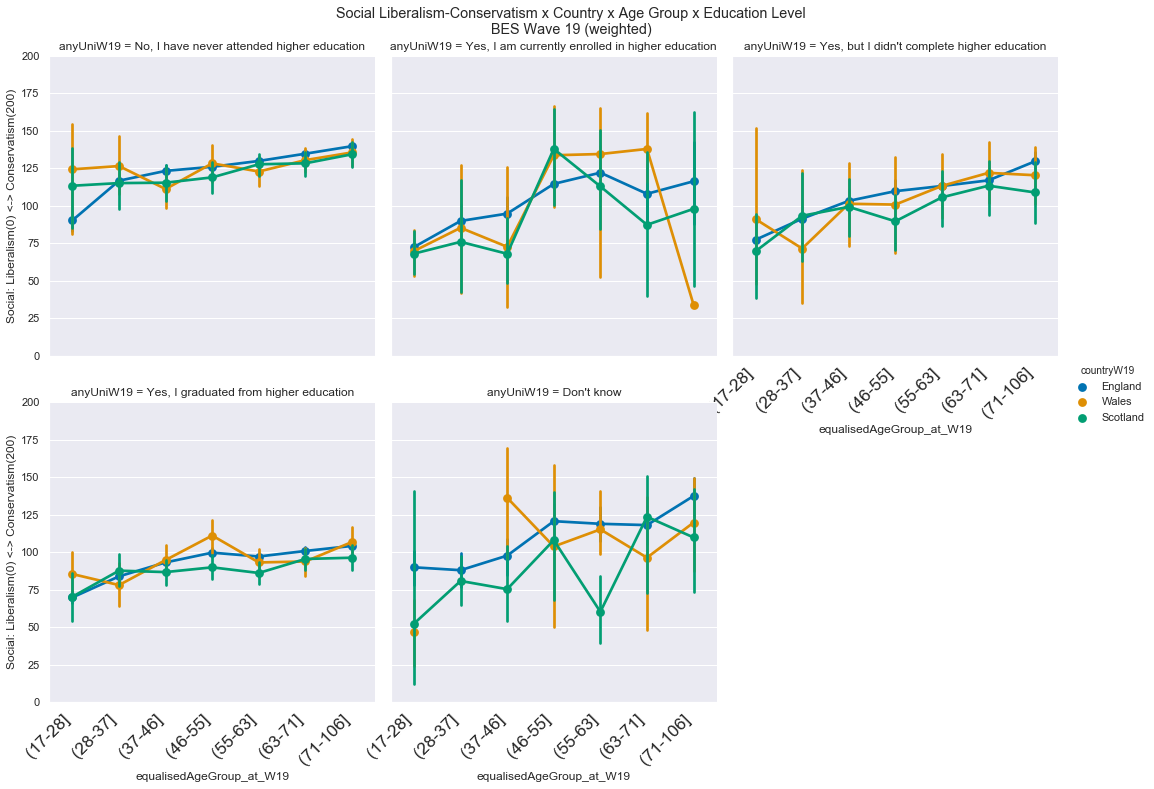

In [168]:
like_var = "Social: Liberalism(0) <-> Conservatism(200)"
wt_var = "wt_new_W19_result"
vote_var = "equalisedAgeGroup_at_W19"
euref_var = "countryW19"
ed_var = "anyUniW19"

df = pd.DataFrame()
df[euref_var] = BES_Panel[euref_var]
df[vote_var] = nicer_age_category_labels( pan_dataset_ages[vote_var] )
df[like_var] = list(zip(pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"],
                                              BES_Panel[wt_var]))
df[ed_var] = BES_Panel[ed_var]
mask = df[euref_var].notnull()&df[vote_var].notnull()&BES_Panel[wt_var].notnull()&df[ed_var].notnull()&\
            pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"].notnull()

df=df[mask]

# df = BES_Panel.groupby([nicer_age_category_labels( pan_dataset_ages[vote_var] ),
#                         BES_Panel[euref_var]])[like_var+"_num_wts"].agg(weighted_mean).reset_index()


# df[wt_var] = BES_Panel
# df = df.replace(replace_dict)
plt.figure(figsize=(12,8));
# ax = sns.pointplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df, estimator=weighted_mean,
#                    n_boot=1000,orient='v');

chart = sns.catplot(x=vote_var, y= like_var, hue=euref_var, col=ed_var, kind="point", data=df, col_wrap=3,
                   estimator=weighted_mean,n_boot=1000,orient='v');

plt.suptitle("Social Liberalism-Conservatism x Country x Age Group x Education Level\nBES Wave 19 (weighted)",y=1.03);
for axes in chart.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize='x-large')


plt.ylim([0,200]);
# ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
# raw_sample_sizes = BES_Panel.groupby([nicer_age_category_labels( pan_dataset_ages[vote_var] ),
#                                       BES_Panel[euref_var]])[like_var+"_num_wts"].count().sort_index(level=1).values

# Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
# count = 0
# for p in ax.patches:
# #     ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
# #             fontsize=10, color='red', ha='center', va='bottom')
#     ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
#             fontsize=10, color='black', ha='center', va='bottom', rotation=90)
#     count = count + 1
# plt.ylabel(like_var);
# plt.title("Economic Left-Right x Country x Age Group\nBES Wave 19 (weighted)");

<Figure size 864x576 with 0 Axes>

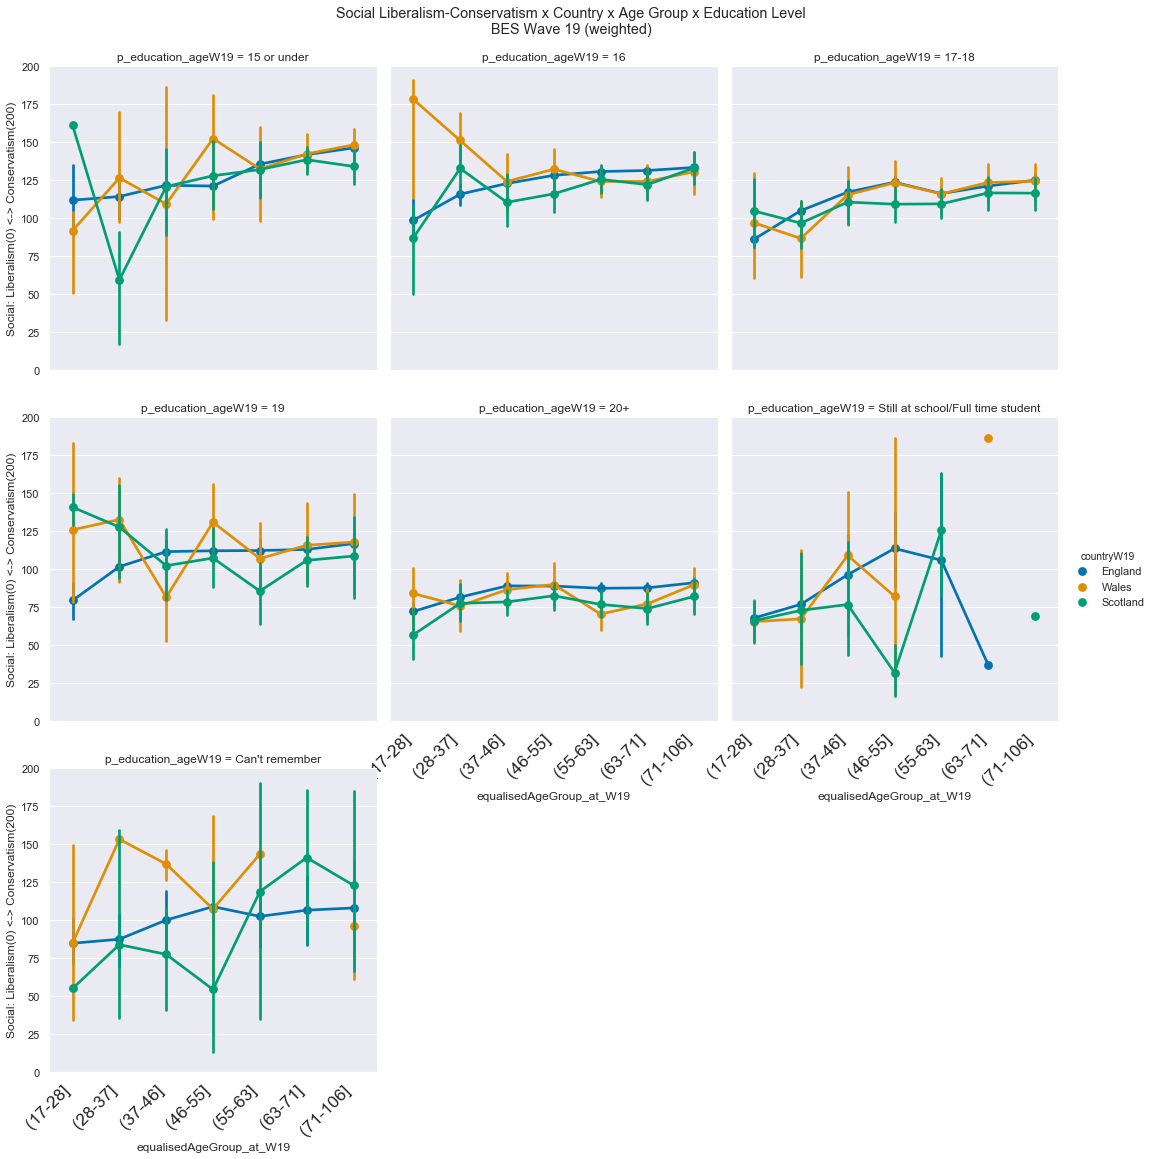

In [169]:
like_var = "Social: Liberalism(0) <-> Conservatism(200)"
wt_var = "wt_new_W19_result"
vote_var = "equalisedAgeGroup_at_W19"
euref_var = "countryW19"
ed_var = "p_education_ageW19"

df = pd.DataFrame()
df[euref_var] = BES_Panel[euref_var]
df[vote_var] = nicer_age_category_labels( pan_dataset_ages[vote_var] )
df[like_var] = list(zip(pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"],
                                              BES_Panel[wt_var]))
df[ed_var] = BES_Panel[ed_var]
mask = df[euref_var].notnull()&df[vote_var].notnull()&BES_Panel[wt_var].notnull()&df[ed_var].notnull()&\
            pan_dataset_allr_values["Social: Liberalism(0) <-> Conservatism(200){uniform}"].notnull()

df=df[mask]

# df = BES_Panel.groupby([nicer_age_category_labels( pan_dataset_ages[vote_var] ),
#                         BES_Panel[euref_var]])[like_var+"_num_wts"].agg(weighted_mean).reset_index()


# df[wt_var] = BES_Panel
# df = df.replace(replace_dict)
plt.figure(figsize=(12,8));
# ax = sns.pointplot(x = vote_var, hue = euref_var, y= like_var+"_num_wts", data=df, estimator=weighted_mean,
#                    n_boot=1000,orient='v');

chart = sns.catplot(x=vote_var, y= like_var, hue=euref_var, col=ed_var, kind="point", data=df, col_wrap=3,
                   estimator=weighted_mean,n_boot=1000,orient='v');

plt.suptitle("Social Liberalism-Conservatism x Country x Age Group x Education Level\nBES Wave 19 (weighted)",y=1.03);
for axes in chart.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize='x-large')


plt.ylim([0,200]);
# ax.axhline(linewidth=1, color='k',linestyle='-.',y=5, alpha=.3)

# raw_sample_sizes = BES_Panel.groupby([vote_var,euref_var])[like_var].count().values
# raw_sample_sizes = BES_Panel.groupby([nicer_age_category_labels( pan_dataset_ages[vote_var] ),
#                                       BES_Panel[euref_var]])[like_var+"_num_wts"].count().sort_index(level=1).values

# Dont_knows = BES_Panel.groupby([vote_var,euref_var])[like_var].agg(lambda x:(x=="Don't know").mean()*10 ).fillna(0).values

# Iterate through the list of axes' patches
# count = 0
# for p in ax.patches:
# #     ax.text(p.get_x() + p.get_width()/2., Dont_knows[count]-.1 , '*', 
# #             fontsize=10, color='red', ha='center', va='bottom')
#     ax.text(p.get_x() + p.get_width()/2., .1 , 'N=%d' % raw_sample_sizes[count], 
#             fontsize=10, color='black', ha='center', va='bottom', rotation=90)
#     count = count + 1
# plt.ylabel(like_var);
# plt.title("Economic Left-Right x Country x Age Group\nBES Wave 19 (weighted)");

In [177]:
gc.collect()

20

In [175]:
attitudinal_var_patterns = pd.read_pickle(BES_small_data_files+"attitudinal_var_patterns.zip",compression='zip')

In [176]:
BES_reduced_with_na = pd.read_pickle("E:\\BES_analysis_data"+os.sep+"BES_reduced_with_na.zip",compression='zip')

In [197]:
BES_reduced_with_na = BES_reduced_with_na.loc[BES_Panel.index]

In [185]:
most_freq_res_country = BES_Panel[match(BES_Panel,"countryW\d+").index].mode(axis=1)
most_freq_res_country = most_freq_res_country[0]

In [181]:
match(BES_reduced_with_na,"|".join(attitudinal_var_patterns.values))

trustMPsW1__A great deal of trust                               29864
trustYourMPW1__A great deal of trust                            27494
dutyToVote2W1__Strongly agree                                   29944
socialPressureVoteW1__Strongly agree                            27844
efficacyUnderstandW1__Strongly agree                            29727
                                                                ...  
auth3W14_To be well-behaved                                      7569
auth4W14_Imaginative                                             7421
childvalues_1W14_Yes                                             7329
genTrustW17_Can't be too careful                                31383
embeshelpW4_No, this would not make them more likely to help      978
Length: 503, dtype: int64

In [191]:
mask = most_freq_res_country.apply(lambda x: x in ["England","Scotland"])
BES_reduced_with_na["ResidentInScotland"] = most_freq_res_country=="Scotland"

In [200]:
BES_att_vals = BES_reduced_with_na.loc[mask,
                                       list(match(BES_reduced_with_na,"|".join(attitudinal_var_patterns.values)).index)+["ResidentInScotland"]]

In [201]:
%%time
# BES_reduced_with_na["trust_per_resp"] = trust_per_resp
pattern = "ResidentInScotland"
name = "ResidentInScotland"
corr_type = "spearman"
corr_df,corr_type = make_corr_summary(BES_att_vals, name, corr_type, pattern=pattern)
display_corr(corr_df, name, corr_type, text_wrap_length=50)

Top 20 positive (spearman) correlations for ResidentInScotland r p N 
 
 normEUW7__Strongly agree 
 0.150000 
 0.00 
 21358 
 
 
 grnGovTrustW5__ Would do a good job 
 0.130000 
 0.00 
 25415 
 
 
 socialPressureVoteW4__Strongly agree 
 0.130000 
 0.00 
 26527 
 
 
 ethno1W7__Strongly agree 
 0.130000 
 0.00 
 27143 
 
 
 welfarePreferenceExpW3__Much too low 
 0.110000 
 0.00 
 5053 
 
 
 lr1W1W2W3W4W5__Strongly agree 
 0.100000 
 0.00 
 35821 
 
 
 efficacyEnjoyVoteW4__Strongly agree 
 0.100000 
 0.00 
 27608 
 
 
 welfarePreferenceW11__Much too low 
 0.090000 
 0.00 
 23682 
 
 
 efficacyUnderstandW3__Strongly agree 
 0.090000 
 0.00 
 24052 
 
 
 lr3W1W2W3W4W5__Strongly agree 
 0.080000 
 0.00 
 36292 
 
 
 turkeyW7__Much better 
 0.080000 
 0.00 
 23464 
 
 
 lr4W6__Strongly agree 
 0.080000 
 0.00 
 26544 
 
 
 lr2W6__Strongly agree 
 0.070000 
 0.00 
 26357 
 
 
 dutyToVote2W3__Strongly agree 
 0.070000 
 0.00 
 24226 
 
 
 radicalW7__Strongly agree 
 0.070000 
 0.00 
 27362 
 
 
 ethno3W9__Strongly agree 
 0.070000 
 0.00 
 6710 
 
 
 racismAmountW4__A lot 
 0.070000 
 0.00 
 27393 
 
 
 cspl5W7__Of great importance 
 0.070000 
 0.00 
 6216 
 
 
 community2W19_It is **not important** to me that[...] 
 0.060000 
 0.00 
 6868 
 
 
 authLong4W10__Strongly agree 
 0.060000 
 0.00 
 6824 
 
 Top 20 negative (spearman) correlations for ResidentInScotland r p N 
 
 keepNukesW4__Strongly agree 
 -0.210000 
 0.00 
 6542 
 
 
 conGovTrustW5__ Would do a good job 
 -0.160000 
 0.00 
 26567 
 
 
 ethno2W9__Strongly agree 
 -0.150000 
 0.00 
 6521 
 
 
 monarchW8__Strongly agree 
 -0.150000 
 0.00 
 29729 
 
 
 grammarW11__Strongly support 
 -0.140000 
 0.00 
 25160 
 
 
 smallPartyWastedVoteW4__Strongly agree 
 -0.130000 
 0.00 
 27520 
 
 
 ethno5W7__Strongly agree 
 -0.120000 
 0.00 
 26940 
 
 
 efficacyTooMuchEffortW3__Strongly agree 
 -0.110000 
 0.00 
 23400 
 
 
 britishPrideW17__Strongly agree 
 -0.110000 
 0.00 
 31322 
 
 
 ethno4W9__Strongly agree 
 -0.110000 
 0.00 
 6641 
 
 
 euUndermineIdentityW7__Strongly agree 
 -0.110000 
 0.00 
 26216 
 
 
 al3W6__Strongly agree 
 -0.110000 
 0.00 
 26588 
 
 
 efficacyVoteEffortW4__Strongly agree 
 -0.110000 
 0.00 
 27838 
 
 
 al1W6__Strongly agree 
 -0.110000 
 0.00 
 26168 
 
 
 efficacyNotUnderstandW3__Strongly agree 
 -0.090000 
 0.00 
 24231 
 
 
 willOfPeopleW16__Strongly agree 
 -0.090000 
 0.00 
 33817 
 
 
 zeroHourContractW6__Should definitely be legal 
 -0.090000 
 0.00 
 24392 
 
 
 blackEqualityW1W2W3W4W5__Gone much too far 
 -0.080000 
 0.00 
 34817 
 
 
 overseasAidW12__Strongly agree 
 -0.080000 
 0.00 
 7905 
 
 
 al4W6__Strongly agree 
 -0.070000 
 0.00 
 26273

Wall time: 40.4 s


In [212]:
search(BES_Panel,"britishPride|ethno1|welfarePreference|racismAmount|keepNukes|monarch|grammar").sort_index()

britishPrideW15           30842
britishPrideW16           37959
britishPrideW17           34366
ethno1W10                 30237
ethno1W7                  30895
ethno1W9                   7482
grammarW10                30237
grammarW11                30956
keepNukesW12              34394
keepNukesW4                7927
keepNukesW7               30895
monarchW8                 33502
racismAmountW4            31551
welfarePreferenceExpW2     5660
welfarePreferenceExpW3     7039
welfarePreferenceExpW4     7994
welfarePreferenceExpW6     7642
welfarePreferenceW11      30956
welfarePreferenceW14      31063
welfarePreferenceW17       8488
welfarePreferenceW7        7682
dtype: int64